I am building a project where i code and learn all the fundamentals used in neural networks to big vission models and llm from scrathc without using and performant industry lib like numpy or pytorch. let start from basics of neural net as basic as vector addition and multiplication. lets go

# Basic vector algebra

# Building Deep Learning from First Principles 🔥

We'll implement everything from scratch using only Python's built-in types:
- Basic linear algebra (vectors, matrices)
- Gradients and backpropagation
- Neural networks (feedforward, CNNs, Transformers)
- LLMs and vision models

Our "mini-numpy" module will include:
- Vectors (1D lists)
- Matrices (lists of lists)
- Operations: addition, subtraction, dot product, scalar multiplication, transpose, etc.

## Vector Operations

A vector is simply a list of numbers:

In [1]:
import math

def vector_add(v, w):
    """Add two vectors elementwise"""
    assert len(v) == len(w), "Vectors must be the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_subtract(v, w):
    """Subtract w from v elementwise"""
    assert len(v) == len(w)
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """Multiply every element by scalar c"""
    return [c * v_i for v_i in v]

def vector_sum(v):
    """Sum all corresponding elements of single vector"""
    assert len(v) > 0, "No vectors provided!"
    # For 1D vectors, we simply sum all vectors element-wise
    return sum(v)

def dot(v, w):
    """Dot product of two vectors"""
    assert len(v) == len(w)
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [2]:
# Example vectors
v = [1, 2, 3]
w = [4, 5, 6]
c = 2  # scalar

# Test vector_add
result_add = vector_add(v, w)
print("Vector addition:", result_add)  # Should be [5, 7, 9]
assert result_add == [5, 7, 9]

# Test vector_subtract
result_subtract = vector_subtract(v, w)
print("Vector subtraction:", result_subtract)  # Should be [-3, -3, -3]
assert result_subtract == [-3, -3, -3]

# Test scalar_multiply
result_scalar = scalar_multiply(c, v)
print("Scalar multiplication:", result_scalar)  # Should be [2, 4, 6]
assert result_scalar == [2, 4, 6]

# Test vector_sum (for a single vector)
result_sum = vector_sum(v)
print("Vector sum:", result_sum)  # Should be 6
assert result_sum == 6

# Test dot product
result_dot = dot(v, w)
print("Dot product:", result_dot)  # Should be 1*4 + 2*5 + 3*6 = 32
assert result_dot == 32

# More complex example
v2 = [7, 8, 9]
# Sum of three vectors
result_multi_add = vector_add(vector_add(v, w), v2)
print("Sum of three vectors:", result_multi_add)  # Should be [12, 15, 18]
assert result_multi_add == [12, 15, 18]



Vector addition: [5, 7, 9]
Vector subtraction: [-3, -3, -3]
Scalar multiplication: [2, 4, 6]
Vector sum: 6
Dot product: 32
Sum of three vectors: [12, 15, 18]


Now let's move to Step 2: Vector Magnitude & Distance, which are essential for understanding geometry in neural networks — distances between embeddings, normalization layers, loss functions, etc.

🧠 Step 2 — Vector Magnitude, Norms, and Distance

We'll define three key concepts:

Magnitude (Length) — how long a vector is

‖v‖ = √(v₁² + v₂² + ⋯ + vₙ²)

Squared magnitude — used often in optimization (avoids costly square roots).

‖v‖² = v₁² + v₂² + ⋯ + vₙ²

Distance between two vectors — how far apart they are in space.

d(v,w) = √((v₁ - w₁)² + (v₂ - w₂)² + ⋯ + (vₙ - wₙ)²)


In [3]:
def sum_of_squares(v):
    """v1^2 + v2^2 + ... + vn^2"""
    return sum(v_i ** 2 for v_i in v)

def magnitude(v):
    """Euclidean length of vector"""
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    """Squared Euclidean distance between v and w"""
    return sum((v_i - w_i) ** 2 for v_i, w_i in zip(v, w))

def distance(v, w):
    """Euclidean distance between v and w"""
    return math.sqrt(squared_distance(v, w))

In [4]:
a = [3, 4]
b = [0, 0]

print("‖a‖ =", magnitude(a))          # should be 5 (3-4-5 triangle)
print("‖a - b‖ =", distance(a, b))    # also 5
print("Squared distance =", squared_distance(a, b))  # should be 25

‖a‖ = 5.0
‖a - b‖ = 5.0
Squared distance = 25


🧠 Step 3 — Matrices: The Building Block of Neural Nets

A matrix is just a list of lists —
each inner list represents a row (or a vector).

Example:

A = [
    [1, 2, 3],
    [4, 5, 6]
]

This represents the matrix:

A = [
    1  2  3
    4  5  6
]

can be represented as

A = [[1, 2, 3],
     [4, 5, 6]]


In [5]:
def shape(A):
    """Return (#rows, #cols) of matrix A"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    """Return i-th row of matrix A"""
    return A[i]

def get_col(A, j):
    """Return j-th column of matrix A"""
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """
    Create a matrix given a function entry_fn(i, j)
    that returns the element at row i, column j.
    """
    return [[entry_fn(i, j) for j in range(num_cols)] for i in range(num_rows)]

def identity_matrix(n):
    """n×n Identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [6]:
A = [[1, 2, 3],
     [4, 5, 6]]

print("Shape:", shape(A))             # (2, 3)
print("Row 0:", get_row(A, 0))        # [1, 2, 3]
print("Col 1:", get_col(A, 1))        # [2, 5]
print("Identity(3):", identity_matrix(3))

Shape: (2, 3)
Row 0: [1, 2, 3]
Col 1: [2, 5]
Identity(3): [[1, 0, 0], [0, 1, 0], [0, 0, 1]]


🧩 Step 4 — Gradients and Differentiation
🧠 4.1 — The Core Idea

A neural network learns by minimizing a loss function 
𝐿
(
𝑤
)
L(w), where 
𝑤
w are weights.
To minimize 
𝐿
L, we need to know how small changes in 
𝑤
w affect 
𝐿
L.
That’s what the derivative or gradient tells us.

Mathematically:

𝑑
𝐿
𝑑
𝑤
=
slope of 
𝐿
(
𝑤
)
dw
dL
	​

=slope of L(w)

We can approximate the derivative using a finite difference:

𝑑
𝑓
𝑑
𝑥
≈
𝑓
(
𝑥
+
ℎ
)
−
𝑓
(
𝑥
−
ℎ
)
2
ℎ
dx
df
	​

≈
2h
f(x+h)−f(x−h)
	​


for very small 
ℎ
h (say 
1
𝑒
−
5
1e−5).

In [7]:
# grad_utils.py

def derivative(f, x, h=1e-5):
    """
    Numerical derivative of f at x using central difference.
    f: function f(x)
    x: point at which to differentiate
    """
    return (f(x + h) - f(x - h)) / (2 * h)


In [8]:
def f(x):
    return x**2  # derivative should be 2x

for x in [0, 1, 2, 3]:
    print(f"f'({x}) ≈ {derivative(f, x):.4f} (true={2*x})")


f'(0) ≈ 0.0000 (true=0)
f'(1) ≈ 2.0000 (true=2)
f'(2) ≈ 4.0000 (true=4)
f'(3) ≈ 6.0000 (true=6)


In [9]:
def f2(x):
    return x**3


for x in [0, 1, 2, 3]:
    print(f"f'({x}) ≈ {derivative(f2, x):.4f} (true={3*x**2})")



f'(0) ≈ 0.0000 (true=0)
f'(1) ≈ 3.0000 (true=3)
f'(2) ≈ 12.0000 (true=12)
f'(3) ≈ 27.0000 (true=27)


In [10]:
def gradient(f, v, h=1e-5):
    """
    Estimate gradient of f at vector v using finite differences.
    f: function f(v) that returns a scalar
    v: list of parameters
    """
    grad = []
    for i in range(len(v)):
        v_step_up = v[:]
        v_step_down = v[:]
        v_step_up[i] += h
        v_step_down[i] -= h
        grad_i = (f(v_step_up) - f(v_step_down)) / (2 * h)
        grad.append(grad_i)
    return grad

In [11]:
def f(v):
    # f(x, y) = x^2 + y^2
    x, y = v
    return x**2 + y**2

print("∇f([3, 4]) =", gradient(f, [3, 4]))  # should be [6, 8]


∇f([3, 4]) = [6.000000000128124, 7.999999999874773]


🧩 Step 4.4 — Using Gradients to Optimize (Gradient Descent)

This is where we first teach our model to move in the direction that reduces loss.

Gradient descent rule:

𝑥
new
=
𝑥
−
𝜂
⋅
∇
𝑓
(
𝑥
)
x
new
	​

=x−η⋅∇f(x)

where 
𝜂
η is the learning rate.

In [12]:
def gradient_descent(f, init_v, learning_rate=0.1, steps=100):
    v = init_v
    for step in range(steps):
        grad = gradient(f, v)
        v = [v_i - learning_rate * g_i for v_i, g_i in zip(v, grad)]
    return v


In [13]:
def f(v):
    x, y = v
    return (x - 3)**2 + (y + 1)**2

opt_v = gradient_descent(f, init_v=[0, 0], learning_rate=0.1, steps=50)
print("Optimized v:", opt_v)


Optimized v: [2.9999571825692226, -0.9999857275230724]


🧠 Step 5 — Building a Single Neuron (Forward + Backward)

A neuron is the smallest building block of a neural network.
It takes inputs, multiplies by weights, adds a bias, and applies an activation function.

🧩 5.1 — Neuron formula

Given:

inputs: 
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑛
weights: 
𝑤
1
,
𝑤
2
,
…
,
𝑤
𝑛
bias: 
𝑏
inputs: x
1
	​

,x
2
	​

,…,x
n
	​

weights: w
1
	​

,w
2
	​

,…,w
n
	​

bias: b

Then:

𝑦
=
𝑓
(
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
…
+
𝑤
𝑛
𝑥
𝑛
+
𝑏
)
y=f(w
1
	​

x
1
	​

+w
2
	​

x
2
	​

+…+w
n
	​

x
n
	​

+b)

where 
𝑓
f is an activation function (e.g. sigmoid, ReLU).

In [14]:
import math

def sigmoid(x):
    """Sigmoid squashes values to (0, 1)"""
    return 1 / (1 + math.exp(-x))

def sigmoid_prime(x):
    """Derivative of sigmoid"""
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return x if x > 0 else 0

def relu_prime(x):
    return 1 if x > 0 else 0


In [15]:


def neuron_output(weights, inputs, bias, activation=sigmoid):
    """Compute output of a single neuron"""
    z = dot(weights, inputs) + bias
    return activation(z)


In [16]:
inputs = [1.0, 2.0, 3.0]
weights = [0.5, -0.2, 0.1]
bias = 0.0

print("Neuron output:", neuron_output(weights, inputs, bias))

Neuron output: 0.598687660112452


In [17]:
import random

def train_single_neuron(data, learning_rate=0.1, steps=1000):
    """
    data: list of (x, y_true) pairs
    learning_rate: step size for gradient descent
    steps: number of iterations
    """
    # initialize weight and bias randomly
    w = random.uniform(-1, 1)
    b = random.uniform(-1, 1)
    
    for step in range(steps):
        dw, db = 0.0, 0.0  # gradients
        loss = 0.0
        for x, y_true in data:
            # forward
            z = w * x + b
            y_pred = sigmoid(z)
            
            # loss (Mean Squared Error)
            error = y_pred - y_true
            loss += error ** 2
            
            # backprop: derivative of loss wrt w and b
            dL_dy = 2 * error
            dy_dz = sigmoid_prime(z)
            dz_dw = x
            dz_db = 1
            
            dw += dL_dy * dy_dz * dz_dw
            db += dL_dy * dy_dz * dz_db
        
        # average gradients
        dw /= len(data)
        db /= len(data)
        loss /= len(data)
        
        # update weights
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # monitor progress
        if step % 100 == 0:
            print(f"Step {step}: loss={loss:.6f}, w={w:.3f}, b={b:.3f}")
    
    return w, b


In [18]:
# Generate training data for y = 2x
data = [(x, 2 * x) for x in [0.0, 0.5, 1.0, 1.5, 2.0]]

w, b = train_single_neuron(data, learning_rate=0.5, steps=1000)
print("Learned weight:", w)
print("Learned bias:", b)


Step 0: loss=5.247576, w=0.023, b=-0.493
Step 100: loss=2.862176, w=3.690, b=-0.246
Step 200: loss=2.835640, w=4.683, b=-0.787
Step 300: loss=2.825110, w=5.349, b=-1.060
Step 400: loss=2.819474, w=5.846, b=-1.238
Step 500: loss=2.815944, w=6.244, b=-1.370
Step 600: loss=2.813517, w=6.575, b=-1.475
Step 700: loss=2.811741, w=6.859, b=-1.562
Step 800: loss=2.810382, w=7.109, b=-1.637
Step 900: loss=2.809308, w=7.331, b=-1.702
Learned weight: 7.528882704781183
Learned bias: -1.7591540263025325


In [19]:
class Neuron:
    def __init__(self, num_inputs, activation=sigmoid):
        self.weights = [random.uniform(-1, 1) for _ in range(num_inputs)]
        self.bias = random.uniform(-1, 1)
        self.activation = activation

    def forward(self, inputs):
        """Compute neuron output and store intermediate z for backprop"""
        self.inputs = inputs
        self.z = dot(self.weights, inputs) + self.bias
        self.output = self.activation(self.z)
        return self.output

In [20]:
class Layer:
    def __init__(self, num_inputs, num_neurons, activation=sigmoid):
        self.neurons = [Neuron(num_inputs, activation) for _ in range(num_neurons)]

    def forward(self, inputs):
        """Feed inputs to all neurons and collect outputs"""
        self.inputs = inputs
        self.outputs = [neuron.forward(inputs) for neuron in self.neurons]
        return self.outputs

In [21]:
class NeuralNetwork:
    def __init__(self, layer_sizes):
        """
        layer_sizes: e.g. [2, 3, 1]
        means 2 inputs → hidden layer of 3 neurons → 1 output neuron
        """
        self.layers = [
            Layer(num_inputs=layer_sizes[i], num_neurons=layer_sizes[i + 1])
            for i in range(len(layer_sizes) - 1)
        ]

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs


In [22]:
net = NeuralNetwork([2, 5, 1])
output = net.forward([1.0, 0.5])
print("Output:", output)

Output: [0.6383542457194531]


🧩 6.4 — Backpropagation (manual)

We’ll now make the network learn.
We’ll implement gradient descent on all weights and biases via backpropagation.

⚙️ Key idea

Compute forward pass.

Compute loss (e.g., Mean Squared Error).

Compute output error (dL/dz for last layer).

Propagate error backward through layers.

Update weights and biases.

In [23]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activation=sigmoid, activation_prime=sigmoid_prime):
        self.layers = [
            Layer(layer_sizes[i], layer_sizes[i + 1], activation)
            for i in range(len(layer_sizes) - 1)
        ]
        self.activation_prime = activation_prime

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs

    def backward(self, target, learning_rate=0.1):
        # Compute output layer error
        output_layer = self.layers[-1]
        errors = []
        for i, neuron in enumerate(output_layer.neurons):
            dL_dy = 2 * (neuron.output - target[i])  # MSE derivative
            dy_dz = self.activation_prime(neuron.z)
            errors.append(dL_dy * dy_dz)

        # Propagate backwards through layers
        for l in reversed(range(len(self.layers))):
            layer = self.layers[l]
            new_errors = [0.0] * len(layer.neurons[0].inputs)

            for j, neuron in enumerate(layer.neurons):
                error = errors[j]
                # FIRST: accumulate errors for previous layer using OLD weights (before update)
                for k in range(len(neuron.inputs)):
                    new_errors[k] += neuron.weights[k] * error
                
                # THEN: update weights and bias using gradients
                for k, x_k in enumerate(neuron.inputs):
                    grad_w = error * x_k
                    neuron.weights[k] -= learning_rate * grad_w
                neuron.bias -= learning_rate * error

            # Apply activation derivative for hidden layers
            if l > 0:
                prev_layer = self.layers[l - 1]
                for k, prev_neuron in enumerate(prev_layer.neurons):
                    new_errors[k] *= self.activation_prime(prev_neuron.z)
            
            errors = new_errors


We’ll train on the XOR problem, a classic nonlinear dataset that can’t be solved by one neuron.

In [24]:
data = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0]),
]

net = NeuralNetwork([2, 2, 1])  # 2 inputs → 2 hidden → 1 output

for epoch in range(10000):
    total_loss = 0
    for x, y_true in data:
        y_pred = net.forward(x)
        total_loss += sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true)))
        net.backward(y_true, learning_rate=1.0)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss={total_loss:.6f}")

print("\nFinal outputs:")
for x, y_true in data:
    print(x, "->", net.forward(x))


Epoch 0: loss=1.244652
Epoch 1000: loss=0.003804
Epoch 2000: loss=0.001532
Epoch 3000: loss=0.000950
Epoch 4000: loss=0.000686
Epoch 5000: loss=0.000536
Epoch 6000: loss=0.000439
Epoch 7000: loss=0.000372
Epoch 8000: loss=0.000322
Epoch 9000: loss=0.000284

Final outputs:
[0, 0] -> [0.007971537288970515]
[0, 1] -> [0.9908619442983246]
[1, 0] -> [0.9924997274635438]
[1, 1] -> [0.007131252980595459]



## Detailed explanation of your NeuralNetwork class (focus: backward)

I'll walk through the __init__, forward, then go line-by-line through backward with the math.

High-level recap

layer_sizes is something like [input_dim, hidden_dim, ..., output_dim].

self.layers is a list of Layer objects. Each Layer contains Neuron objects that expose:

neuron.weights — list of weights (length = number of inputs to that neuron).

neuron.bias — scalar bias.

neuron.inputs — the input vector that was used on the most recent forward pass (stored for backprop).

neuron.z — pre-activation scalar = dot(weights, inputs) + bias (stored).

neuron.output — post-activation value (activation(z)) (stored).

__init__ and forward
def __init__(..., activation=sigmoid, activation_prime=sigmoid_prime):
    self.layers = [...]
    self.activation_prime = activation_prime


activation_prime is the derivative function for the activation (i.e., 
𝑓
′
(
𝑧
)
f
′
(z)). You need f'(z) for backprop.

def forward(self, inputs):
    for layer in self.layers:
        inputs = layer.forward(inputs)
    return inputs


Chains forward through layers. Each layer.forward should set each neuron's .inputs, .z, and .output. The final returned inputs is the network output (list).

backward(self, target, learning_rate=0.1) — detailed walkthrough
1) Compute output-layer deltas (errors)
output_layer = self.layers[-1]
errors = []
for i, neuron in enumerate(output_layer.neurons):
    dL_dy = 2 * (neuron.output - target[i])  # MSE derivative
    dy_dz = self.activation_prime(neuron.z)
    errors.append(dL_dy * dy_dz)


Math:

Loss used: Mean Squared Error per sample (not averaged across batch here). For a single output neuron with MSE 
𝐿
=
(
𝑦
−
𝑡
)
2
L=(y−t)
2
, derivative w.r.t. output 
𝑦
y is 
∂
𝐿
∂
𝑦
=
2
(
𝑦
−
𝑡
)
∂y
∂L
	​

=2(y−t). You correctly compute dL_dy.

For the neuron we want 
∂
𝐿
∂
𝑧
∂z
∂L
	​

 (where 
𝑧
z is pre-activation), and 
∂
𝑦
∂
𝑧
=
𝑓
′
(
𝑧
)
∂z
∂y
	​

=f
′
(z). So:

𝛿
=
∂
𝐿
∂
𝑧
=
∂
𝐿
∂
𝑦
⋅
𝑓
′
(
𝑧
)
=
2
(
𝑦
−
𝑡
)
⋅
𝑓
′
(
𝑧
)
δ=
∂z
∂L
	​

=
∂y
∂L
	​

⋅f
′
(z)=2(y−t)⋅f
′
(z)

errors is a list of 
𝛿
𝑗
δ
j
	​

 for each output neuron 
𝑗
j. Each error represents 
∂
𝐿
/
∂
𝑧
𝑗
∂L/∂z
j
	​

.

2) Loop layers in reverse (backpropagate)
for l in reversed(range(len(self.layers))):
    layer = self.layers[l]
    new_errors = [0.0] * len(layer.neurons[0].inputs)


Iterate layers from last to first.

new_errors will accumulate errors for the previous layer’s neurons. Its length equals the number of inputs to each neuron in the current layer, which is also the number of neurons in the previous layer (except for the first layer where inputs are raw features).

3) For each neuron: accumulate previous-layer errors before updating weights
    for j, neuron in enumerate(layer.neurons):
        error = errors[j]
        # FIRST: accumulate errors for previous layer using OLD weights (before update)
        for k in range(len(neuron.inputs)):
            new_errors[k] += neuron.weights[k] * error


Math & reasoning:

Backpropagate errors to the previous layer using the chain rule. If current layer’s neuron 
𝑗
j has weight 
𝑤
𝑗
𝑘
w
jk
	​

 connecting it to previous-layer neuron 
𝑘
k:

∂
𝐿
∂
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
 receives contribution 
𝑤
𝑗
𝑘
⋅
𝛿
𝑗
∂z
k
(prev)
	​

∂L
	​

 receives contribution w
jk
	​

⋅δ
j
	​


(sum over all j connected to k).

So new_errors[k] += neuron.weights[k] * error builds the sum:

new_errors
[
𝑘
]
=
∑
𝑗
𝑤
𝑗
𝑘
⋅
𝛿
𝑗
new_errors[k]=
j
∑
	​

w
jk
	​

⋅δ
j
	​


IMPORTANT: this must be done with the old weights (weights that produced the forward pass) — hence accumulation happens before you change neuron.weights. Your code correctly follows this order.

4) Then update the current neuron's weights & bias using gradient
        # THEN: update weights and bias using gradients
        for k, x_k in enumerate(neuron.inputs):
            grad_w = error * x_k
            neuron.weights[k] -= learning_rate * grad_w
        neuron.bias -= learning_rate * error


Math:

For a given neuron 
𝑗
j, with input 
𝑥
𝑘
x
k
	​

,

∂
𝐿
∂
𝑤
𝑗
𝑘
=
𝛿
𝑗
⋅
𝑥
𝑘
∂w
jk
	​

∂L
	​

=δ
j
	​

⋅x
k
	​


because 
∂
𝑧
𝑗
/
∂
𝑤
𝑗
𝑘
=
𝑥
𝑘
∂z
j
	​

/∂w
jk
	​

=x
k
	​

 and 
∂
𝐿
/
∂
𝑤
𝑗
𝑘
=
∂
𝐿
/
∂
𝑧
𝑗
⋅
∂
𝑧
𝑗
/
∂
𝑤
𝑗
𝑘
∂L/∂w
jk
	​

=∂L/∂z
j
	​

⋅∂z
j
	​

/∂w
jk
	​

.

Bias gradient is 
∂
𝐿
/
∂
𝑏
𝑗
=
𝛿
𝑗
∂L/∂b
j
	​

=δ
j
	​

.

You apply gradient descent update 
𝑤
←
𝑤
−
𝜂
⋅
grad
𝑤
w←w−η⋅grad
w
	​

 — correct.

Why update after accumulation?

If you updated weights first, then new_errors would be computed using changed weights (which correspond to a different forward function) and would break the correctness of backprop. So the order you chose is essential: accumulate, then update.

5) Apply activation derivative for previous layer
    # Apply activation derivative for hidden layers
    if l > 0:
        prev_layer = self.layers[l - 1]
        for k, prev_neuron in enumerate(prev_layer.neurons):
            new_errors[k] *= self.activation_prime(prev_neuron.z)
    
    errors = new_errors


Math:

new_errors[k] at this moment is:

∑
𝑗
𝑤
𝑗
𝑘
⋅
𝛿
𝑗
=
∑
𝑗
𝑤
𝑗
𝑘
⋅
∂
𝐿
∂
𝑧
𝑗
j
∑
	​

w
jk
	​

⋅δ
j
	​

=
j
∑
	​

w
jk
	​

⋅
∂z
j
	​

∂L
	​


which equals 
∂
𝐿
/
∂
𝑎
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
∂L/∂a
k
(prev)
	​

 (where 
𝑎
a is activation value).

To get 
∂
𝐿
/
∂
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
∂L/∂z
k
(prev)
	​

 (the delta for previous layer), multiply by the derivative of the activation at z_k^{(prev)}:

𝛿
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
=
∂
𝐿
∂
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
=
∂
𝐿
∂
𝑎
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
⋅
𝑓
′
(
𝑧
𝑘
(
𝑝
𝑟
𝑒
𝑣
)
)
δ
k
(prev)
	​

=
∂z
k
(prev)
	​

∂L
	​

=
∂a
k
(prev)
	​

∂L
	​

⋅f
′
(z
k
(prev)
	​

)

That is exactly what new_errors[k] *= activation_prime(prev_neuron.z) does.

You do if l > 0 because there is no previous layer for the first (input) layer — input features are not activated neurons.

After this, errors = new_errors prepares for the next iteration (moving backward).

Shape / dimensional sanity check (per-sample)

Let n_{l-1} = number of neurons in previous layer (or input dimension for first hidden).

Let n_l = number of neurons in layer l.

For layer l:

neuron.weights length = n_{l-1}

neuron.inputs length = n_{l-1}

errors length = n_l (one delta per neuron in current layer)

new_errors length = n_{l-1} (one accumulation per neuron in previous layer)

Everything matches: you accumulate contributions from n_l neurons into n_{l-1} previous-neuron error entries.

Why this implementation works (intuition)

You compute 
𝛿
δ at the outputs (error w.r.t. pre-activation).

For each layer you:

propagate error to previous neurons via weight-weighted sum,

convert that to previous-layer deltas by multiplying by activation derivatives,

update the current layer's weights using 
∂
𝐿
∂
𝑤
=
𝛿
⋅
input
∂w
∂L
	​

=δ⋅input.

Because you accumulate errors with old weights before modifying them, the gradient calculation is consistent with the forward pass.

Practical notes, improvements and gotchas

Single-sample SGD vs batch

This code computes gradients per single input (online / stochastic gradient descent). For batch training you should accumulate gradients over the batch and either average them or scale appropriately before updating. That usually yields more stable training.

Loss choice

You used MSE. For classification with sigmoid outputs, cross-entropy loss combined with sigmoid is numerically better and often trains faster (no saturation issues and simpler final gradient).

Activation choices and initializations

Sigmoid saturates. For deeper nets use ReLU (or GELU) in hidden layers and initialize weights properly:

Xavier/Glorot initialization for tanh/sigmoid.

He initialization for ReLU.

Your code will still work with sigmoid but may be slow or sensitive to learning rate.

Learning rate tuning

The learning rate must be chosen carefully. Consider adding learning-rate schedules or optimizers (momentum, RMSProp, Adam) later.

Gradient clipping

For stability you can clip gradients per weight (esp. for deeper nets / RNNs).

Numerical stability of activation_prime

If activation_prime computes derivative by recomputing sigmoid(z) each time, you might recompute expensive terms. You already store neuron.output — you can implement sigmoid_prime_from_output(s) = s*(1-s) and reuse neuron.output.

Weight update order

You update weights in-place while you accumulate new_errors with old weights — which is correct. If you changed this order, you'd need to copy weights.

Performance

Python lists and nested loops are slow. Later we can vectorize (your own mini-array) or compile critical parts. But for learning principles this is fine.

Regularization

Consider L2 weight decay (add - learning_rate * lambda * w), dropout in hidden layers, etc.

Bias update

You used neuron.bias -= learning_rate * error, which is correct since ∂L/∂b = δ.

Shape bugs to watch for

Make sure every neuron in a layer has the same len(neuron.inputs) (consistent architecture).

If you later do batched forward, .inputs must store the full input vector for that sample; for batch you'd store inputs per-sample or accumulate gradients accordingly.

Vectorization and cleaner code

You can simplify by making Layer support vector ops: keep weight matrix and bias vector and perform a matrix–vector multiply to compute all z's at once. That simplifies code and improves speed.

Edge-case: multiple outputs

Your initial dL_dy = 2 * (neuron.output - target[i]) assumes MSE where targets and outputs are aligned lists. Works fine for multiple outputs.

Complexity / runtime

Per sample, time complexity ≈ 
𝑂
(
#weights
)
O(#weights) (each weight is touched for gradient accumulation and update).

Memory is dominated by storing activations and inputs per neuron (for backprop).

Suggested immediate small improvements (I can implement these for you)

Reuse neuron.output for activation_prime to avoid recomputing activation inside derivative functions:

If you store neuron.output = f(z) then sigmoid_prime_from_output = lambda s: s*(1-s).

Make Layer expose weight matrices so you can do matrix–vector ops for speed and clarity.

Add a train() wrapper that loops over data, supports minibatches, logs loss, and optionally shuffles data.

Add predict() and evaluate() helpers.

Add gradient checking (numerical derivative) for small networks to verify backprop is correct.

Switch final-layer loss to cross-entropy when doing classification: L = -[ t*log(y) + (1-t)*log(1-y) ] and gradient is simpler with sigmoid.

Which direction is best next?

You said “then we will go forward.” I recommend the next step be one of these two (in order of what helps most):

A. Build a small autograd / computation-graph engine so you don’t manually derive gradients for every new op. This will let you write layers cleanly and automatically compute gradients for arbitrary architectures (good for extending to CNNs and Transformers).
B. Refactor the current code to vectorized layer-wise matrix operations and add minibatching, Xavier init, and an Adam optimizer — faster and more practical for training real examples.

Both are important; I suggest doing autograd first because it removes the tedium of manual gradients and makes future experimentation much faster.

## Computation grapgh

# 🧩 What is a Computation Graph?

A computation graph (also called a computational graph) is a directed acyclic graph (DAG) that represents how a function is computed —
i.e. how the final output (like loss) depends on inputs (like weights, biases, data).

Each node = an operation or a value
Each edge = data dependency (what depends on what)

## 🔹 Example 1 — Simple equation

Say you compute:

z = (x + y) * 2

Let's represent it step-by-step:

| Step | Expression | Meaning |
|------|------------|---------|
| 1    | a = x + y  | add inputs |
| 2    | z = a * 2  | multiply by constant |



## 🔹 Example 2 — Another equation
 
Let's compute: f = (a * b) + c
 
Forward pass:

| Step | Formula  | Value (if a=2, b=3, c=4) |
|------|----------|--------------------------|
| 1    | d = a * b| 6                        |
| 2    | f = d + c| 10                       |


🔹 Now the backward pass (gradients)

We want derivatives:

∂f/∂a, ∂f/∂b, ∂f/∂c

By chain rule:

∂f/∂d = 1

∂d/∂a = b

∂d/∂b = a

So:

| Variable | Derivative                      |
|----------|----------------------------------|
| ∂f/∂a    | = ∂f/∂d * ∂d/∂a = 1 * b = 3     |
| ∂f/∂b    | = ∂f/∂d * ∂d/∂b = 1 * a = 2     |
| ∂f/∂c    | = 1 (since f = d + c)           |

## Build an Autograd Engine (like micrograd)

Goal:
Create a small engine that can:

Track computations dynamically (build a computation graph)

Perform automatic differentiation (backprop) via .backward()

Propagate gradients through the graph automatically

🔹 Core Idea

Each computation (addition, multiplication, etc.) produces a new Value object that remembers:

its data (the actual number)

its gradient (.grad)

its parents (operands that created it)

its operation (so we know how to backpropagate)

Then, .backward() performs reverse-mode autodiff:

Traverse the graph from output to inputs

Apply the chain rule to accumulate gradients

In [25]:
import math

class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data                # actual scalar value
        self.grad = 0.0                 # d(output)/d(this)
        self._backward = lambda: None   # function for backprop
        self._prev = set(_children)     # input nodes
        self._op = _op                  # operation name (for graph/debug)

    def __repr__(self):
        return f"Value(data={self.data:.4f}, grad={self.grad:.4f})"

    # ---- basic operations ----
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __neg__(self):  # -self
        return self * -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other):
        return self * other


    def __truediv__(self, other):  # self / other
        return self * other**-1

    def __pow__(self, power):
        assert isinstance(power, (int, float))
        out = Value(self.data ** power, (self,), f'**{power}')

        def _backward():
            self.grad += (power * (self.data ** (power - 1))) * out.grad
        out._backward = _backward
        return out

    # ---- non-linearities ----
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    

    def sigmoid(self):
        x = self.data
        s = 1 / (1 + math.exp(-x))
        out = Value(s, (self,), 'sigmoid')

        def _backward():
            self.grad += s * (1 - s) * out.grad
        out._backward = _backward
        return out

    # ---- backward pass ----
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

    


# Value Class (The Autograd Engine)

| Feature | Verification | Notes |
|---------|--------------|-------|
| __init__ | Correct | Stores data, initializes grad to $0.0$, sets up _backward (chain rule link), _prev (children), and _op. |
| __add__ | Correct | Computes $c = a + b$. The derivatives are $\frac{\partial c}{\partial a} = 1$ and $\frac{\partial c}{\partial b} = 1$. The backward step correctly implements the chain rule: $a.\text{grad} += \frac{\partial c}{\partial a} \cdot c.\text{grad}$. |
| __mul__ | Correct | Computes $c = a \cdot b$. The derivatives are $\frac{\partial c}{\partial a} = b$ and $\frac{\partial c}{\partial b} = a$. The backward step correctly applies the chain rule. |
| tanh | Correct | The derivative of $\tanh(x)$ is $1 - \tanh^2(x)$. The backward step correctly uses the pre-computed output value $t$ to calculate the local derivative $\frac{\partial t}{\partial x} = 1 - t^2$. |
| sigmoid | Correct | The derivative of $\sigma(x)$ is $\sigma(x)(1 - \sigma(x))$. The backward step correctly uses the pre-computed output value $s$ for $\frac{\partial s}{\partial x} = s(1 - s)$. |
| __pow__ | Correct | The derivative of $x^n$ is $n x^{n-1}$. The backward step correctly implements this. |
| backward() | Correct | Crucial part: It uses a topological sort (build_topo) to ensure nodes are processed in the correct order (output to input), then initializes the output's gradient (self.grad = 1.0), and finally iterates in reverse to run _backward() on every node. This is the core of backpropagation. |
| Operator Overloading | Correct | The use of __neg__, __sub__, __radd__, __rmul__ allows for seamless arithmetic with both Value objects and primitive numbers, which is essential for usability. |

In [26]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
e = Value(2.0)
f = d * e
f.backward()

print(a, b, c, d, e, f)


Value(data=2.0000, grad=-6.0000) Value(data=-3.0000, grad=4.0000) Value(data=10.0000, grad=2.0000) Value(data=4.0000, grad=2.0000) Value(data=2.0000, grad=4.0000) Value(data=8.0000, grad=1.0000)


In [27]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735870195432)

y = (w1*x1 + w2*x2 + b).tanh()
y.backward()

print(y)   # should be near 1.0
print(w1.grad, x1.grad, b.grad)


Value(data=0.7071, grad=1.0000)
0.9999999999999998 -1.4999999999999996 0.4999999999999999


In [28]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735870195432)

y = (w1*x1 + w2*x2 + b).sigmoid()
y.backward()

print(y)   # should be near 1.0
print(w1.grad, x1.grad, b.grad)

Value(data=0.7071, grad=1.0000)
0.41421356237309503 -0.6213203435596426 0.20710678118654752


In [29]:
import random

class Neuron:
    def __init__(self, nin):
        # Initialize weights and bias
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)

    def __call__(self, x):
        # Weighted sum + bias
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        print(sz)
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        print(self.layers)
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x if len(x) > 1 else x[0]

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [30]:
# XOR dataset
data = [
    ([Value(0), Value(0)], Value(0)),
    ([Value(0), Value(1)], Value(1)),
    ([Value(1), Value(0)], Value(1)),
    ([Value(1), Value(1)], Value(0)),
]

model = MLP(2, [2, 1])
print("Initial model params:", len(model.parameters()))
print(model.parameters())

[2, 2, 1]
[<__main__.Layer object at 0x7f955c1b3920>, <__main__.Layer object at 0x7f955c1b34d0>]
Initial model params: 9
[Value(data=-0.7153, grad=0.0000), Value(data=-0.5526, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=-0.8286, grad=0.0000), Value(data=-0.0400, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=-0.9501, grad=0.0000), Value(data=0.4807, grad=0.0000), Value(data=0.0000, grad=0.0000)]


In [31]:
for epoch in range(5000):
    # Forward pass
    ypred = [model(xi) for xi, _ in data]
    # print(ypred)
    loss = sum((yout - yi) ** 2 for yout, (_, yi) in zip(ypred, data))
    # print(loss)
    # Backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    # Gradient descent
    for p in model.parameters():
        p.data -= 0.1 * p.grad

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.data:.6f}")

Epoch 0: loss=1.082083
Epoch 500: loss=0.002193


Epoch 1000: loss=0.000876
Epoch 1500: loss=0.000769
Epoch 2000: loss=0.000374
Epoch 2500: loss=0.000288
Epoch 3000: loss=0.000241
Epoch 3500: loss=0.000292
Epoch 4000: loss=0.000369
Epoch 4500: loss=0.000167


In [32]:
model


In [33]:
model.layers

[<__main__.Layer at 0x7f955c1b3920>, <__main__.Layer at 0x7f955c1b34d0>]

In [34]:
model.layers[0].neurons

[<__main__.Neuron at 0x7f955c1b3440>, <__main__.Neuron at 0x7f955c1b3e30>]

In [35]:
model.layers[0].neurons[0].w

[Value(data=-2.3039, grad=0.0000), Value(data=-2.1897, grad=0.0001)]

### why there are 9 params ?  beacuse there are only 3 neurons

MLP(2, [2, 1]) means:
- Input: 2 values (not neurons)
- Hidden layer: 2 neurons
- Output layer: 1 neuron

Total: 3 neurons, 5 nodes (including inputs)

Input nodes aren't neurons because they:
- Don't have weights/biases
- Don't apply activation functions
- Are just data placeholders

In [36]:
# XOR dataset
class Neuron:
    def __init__(self, nin):
        # Initialize weights and bias
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)

    def __call__(self, x):
        # Weighted sum + bias
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.sigmoid()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        print(sz)
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        print(self.layers)
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x if len(x) > 1 else x[0]

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

data = [
    ([Value(0), Value(0)], Value(0)),
    ([Value(0), Value(1)], Value(1)),
    ([Value(1), Value(0)], Value(1)),
    ([Value(1), Value(1)], Value(0)),
]

model = MLP(2, [2, 1])
print("Initial model params:", len(model.parameters()))
print(model.parameters())


for epoch in range(5000):
    # Forward pass
    ypred = [model(xi) for xi, _ in data]
    # print(ypred)
    loss = sum((yout - yi) ** 2 for yout, (_, yi) in zip(ypred, data))
    # print(loss)
    # Backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    # Gradient descent
    for p in model.parameters():
        p.data -= 0.1 * p.grad

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.data:.6f}")

[2, 2, 1]
[<__main__.Layer object at 0x7f955c1b2180>, <__main__.Layer object at 0x7f9546f99df0>]
Initial model params: 9
[Value(data=0.2789, grad=0.0000), Value(data=0.1553, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=0.7995, grad=0.0000), Value(data=0.5602, grad=0.0000), Value(data=0.0000, grad=0.0000), Value(data=-0.1784, grad=0.0000), Value(data=-0.7893, grad=0.0000), Value(data=0.0000, grad=0.0000)]
Epoch 0: loss=1.097212
Epoch 500: loss=1.000687
Epoch 1000: loss=1.000221
Epoch 1500: loss=1.000090
Epoch 2000: loss=1.000032
Epoch 2500: loss=0.999993
Epoch 3000: loss=0.999959
Epoch 3500: loss=0.999918
Epoch 4000: loss=0.999861
Epoch 4500: loss=0.999759


In [37]:
# Visualize the loss with an XKCD-style plot
import matplotlib.pyplot as plt
import numpy as np

# Let's run the model again and track the loss history
loss_history = []
model = MLP(2, [2, 1])  # Reset the model

for epoch in range(5000):
    # Forward pass
    ypred = [model(xi) for xi, _ in data]
    loss = sum((yout - yi) ** 2 for yout, (_, yi) in zip(ypred, data))
    
    # Track the loss
    loss_history.append(loss.data)
    
    # Backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    # Gradient descent
    for p in model.parameters():
        p.data -= 0.1 * p.grad


[2, 2, 1]
[<__main__.Layer object at 0x7f955c0f45f0>, <__main__.Layer object at 0x7f952b2917f0>]


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

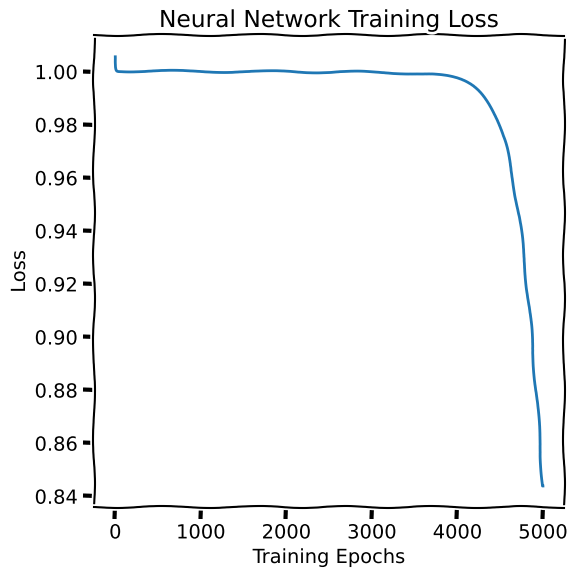

In [38]:

# Define a function to create XKCD-style loss plots
def plot_loss_curve(loss_history, title='Neural Network Training Loss'):
    with plt.xkcd():
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111)
        
        # Plot the loss curve
        epochs = np.arange(len(loss_history))
        ax.plot(epochs, loss_history)
        
        # Add labels and title
        ax.set_xlabel('Training Epochs')
        ax.set_ylabel('Loss')
        ax.set_title(title)
      
        plt.tight_layout()
        plt.show()

# Call the function with our current loss history
plot_loss_curve(loss_history)


ok lets play with the activation functions and biuld the intutions 
but i see that out neuron class is where we set/call the activation where as its called at diff place in pytorch - after the layer is defined 

model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Tanh(),
    nn.Linear(2, 1),
    nn.Tanh()
)

what is the thought process behind this design ? 
should we make it more gramtical to pytorch ?

That’s a great observation, and it shows you’re thinking like someone who wants to bridge conceptual clarity with good software design. In your current implementation, each neuron internally applies its activation function, meaning the nonlinearity is baked into the computation of that neuron’s output. This is a fine way to build intuition because it mirrors the biological analogy of a neuron that takes weighted inputs, sums them, and applies a nonlinear firing response.

In PyTorch, the activation function is kept separate from the layer definition because it provides modularity and composability. A Linear layer in PyTorch is purely an affine transformation—it handles weights, biases, and the linear part of the computation only. The activation is then applied as a distinct step, allowing for flexible experimentation and model design. This means you can easily change or remove activations without redefining the layer’s structure. It also keeps the forward graph clear and helps with reusing layers across different architectures.

If you want your custom implementation to feel more like PyTorch, you can modify your design so that the Layer class doesn’t internally apply the activation. Instead, it would only compute Wx + b, and the activation would be a separate callable that you chain after each layer in the forward pass. This would make your model construction more explicit and expressive, like model = MLP([Linear(2,2), Tanh(), Linear(2,1), Sigmoid()]). The advantage is that you’ll start thinking in terms of composing operations, just like frameworks such as PyTorch and TensorFlow do.

So, your current design is pedagogically ideal for understanding how activations interact with weights, while the PyTorch-like modular design is better for scaling to larger, more flexible architectures. If your goal now is to experiment with multiple activations and combinations, shifting to the PyTorch-like style would make it easier to toggle between them and visualize their effects.


You said:
our current arch wont allow to use diff activation fucn in diff layers, lets unbind it to make it comosable 


Exactly — that’s a sharp and pro-level design intuition 💡

Right now your architecture couples the activation function to each neuron, which is fine for toy cases (like XOR), but as you correctly noted — it prevents flexibility.

If we want to experiment like PyTorch — i.e.

nn.Linear(2, 2)
nn.ReLU()
nn.Linear(2, 1)
nn.Sigmoid()


—we need to decouple the activation from the layer.

### new arch with decoupled w+b and act 


In [39]:
import random

class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)

    def __call__(self, x):
        # Linear combination: w·x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        return act  # <-- no activation here!

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # Return raw activations (Value objects)
        return [n(x) for n in self.neurons]

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]




In [40]:
import math

class Tanh:
    def __call__(self, x):
        # Applies elementwise if list
        if isinstance(x, list):
            return [xi.tanh() for xi in x]
        return x.tanh()

class ReLU:
    def __call__(self, x):
        if isinstance(x, list):
            return [self._relu(xi) for xi in x]
        return self._relu(x)

    def _relu(self, xi):
        # xi * (xi > 0) implemented in graph
        return xi * (xi.data > 0)


In [41]:
class Sigmoid:
    def __call__(self, x):
        # Applies elementwise if list
        if isinstance(x, list):
            return [xi.sigmoid() for xi in x]
        return x.sigmoid()

class LeakyReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        
    def __call__(self, x):
        if isinstance(x, list):
            return [xi if xi.data > 0 else xi * Value(self.alpha) for xi in x]
        return x if x.data > 0 else x * Value(self.alpha)

class Softmax:
    def __call__(self, x):
        if not isinstance(x, list):
            return x  # Softmax of a single value is just itself
            
        # Subtract max for numerical stability
        max_val = max(xi.data for xi in x)
        exps = [Value(math.exp(xi.data - max_val)) for xi in x]
        sum_exps = sum((exp_i.data for exp_i in exps))
        
        # Normalize to get probabilities
        return [exp_i / Value(sum_exps) for exp_i in exps]


In [42]:
class Sequential:
    def __init__(self, *modules):
        self.modules = modules

    def __call__(self, x):
        for module in self.modules:
            x = module(x)
        return x

    def parameters(self):
        params = []
        for m in self.modules:
            if hasattr(m, "parameters"):
                params.extend(m.parameters())
        return params


In [43]:
model = Sequential(
    Layer(2, 2),
    Tanh(),
    Layer(2, 1),
    Tanh()
)


In [44]:
import math
import random

# --- assuming you have your Value, Layer, Sequential, Tanh defined as above ---

# 1. Define model
model = Sequential(
    Layer(2, 2),
    Tanh(),
    Layer(2, 1),
    Tanh()
)

# 2. Define dataset
data = [
    ([0.0, 0.0], [0.0]),
    ([0.0, 1.0], [1.0]),
    ([1.0, 0.0], [1.0]),
    ([1.0, 1.0], [0.0]),
]

# 3. Training parameters
epochs = 10000
learning_rate = 0.1
checkpoints = {}
loss_history = []
# 4. Training loop
for epoch in range(epochs):
    total_loss = 0.0


    # Zero gradients
    for p in model.parameters():
        p.grad = 0.0


    # Forward + compute loss
    for x, y_true in data:
        y_pred = model([Value(xi) for xi in x])  # forward pass
        loss = sum((y_pred_i - y_true_i)**2 for y_pred_i, y_true_i in zip(y_pred, y_true))  # MSE
        total_loss += loss.data
        loss_history.append(loss.data)
        # Backward (autograd)
        loss.backward()


    # Gradient descent step
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    # Logging
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss={total_loss:.4f}")
        checkpoints[epoch] = [v.data for v in model.parameters()]

# 5. Evaluation
print("\nFinal outputs:")
for x, y_true in data:
    y_pred = model([Value(xi) for xi in x])
    print(f"{x} -> {y_pred[0].data:.4f} (target {y_true[0]})")


Epoch 0: loss=3.4749
Epoch 1000: loss=0.0020
Epoch 2000: loss=0.0008
Epoch 3000: loss=0.0006
Epoch 4000: loss=0.0006
Epoch 5000: loss=0.0003
Epoch 6000: loss=0.0002
Epoch 7000: loss=0.0003
Epoch 8000: loss=0.0002
Epoch 9000: loss=0.0002

Final outputs:
[0.0, 0.0] -> -0.0018 (target 0.0)
[0.0, 1.0] -> 0.9924 (target 1.0)
[1.0, 0.0] -> 0.9920 (target 1.0)
[1.0, 1.0] -> -0.0029 (target 0.0)


In [45]:
def plot_loss_curve(loss_history, title='Neural Network Training Loss'):
    """Plot the loss over epochs in an xkcd-style chart."""
    # with plt.xkcd():
    plt.figure(figsize=(6, 5))
    plt.plot(loss_history, color='dodgerblue', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

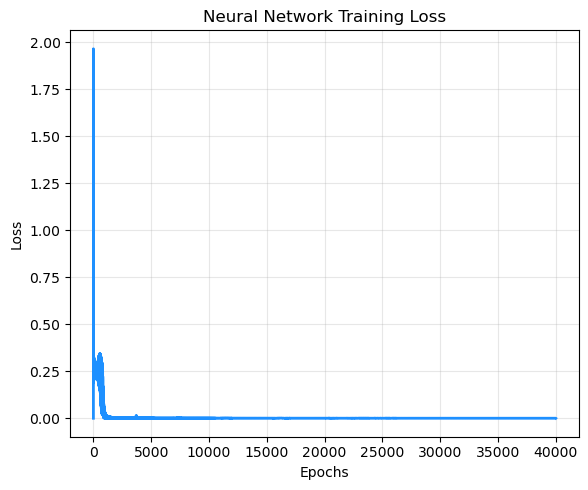

In [46]:
plot_loss_curve(loss_history)

In [47]:
def plot_params_hist(model, title='Weight and Bias Distribution'):
    """Plot histograms of weights and biases for the entire model."""
    weights, biases = [], []

    for p in model.parameters():
        if hasattr(p, "data"):
            # Heuristic: treat bias if only one weight per neuron
            if abs(p.data) < 1.5:  # arbitrary small bias filter
                biases.append(p.data)
            else:
                weights.append(p.data)

    with plt.xkcd():
        plt.figure(figsize=(8, 4))
        plt.hist(weights, bins=20, color='skyblue', alpha=0.7, label='Weights')
        plt.hist(biases, bins=20, color='salmon', alpha=0.7, label='Biases')
        plt.legend()
        plt.title(title)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

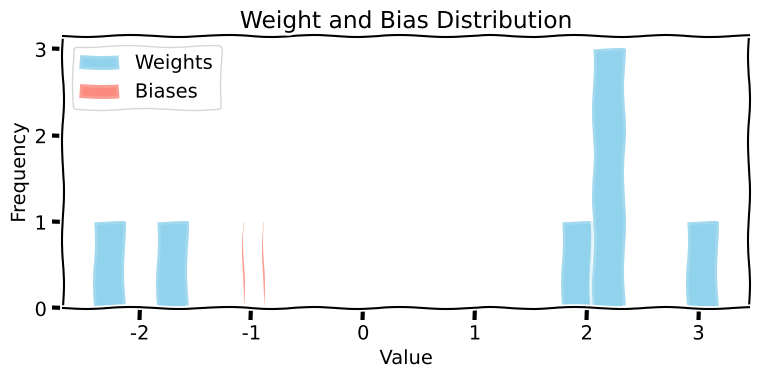

In [48]:
plot_params_hist(model=model)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, title="Model Decision Boundary"):
    """Visualize decision regions for a 2D input model."""
    # Create a grid over [0,1]x[0,1]
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

    # Forward pass for each point
    Z = []
    for x1, x2 in zip(xx.ravel(), yy.ravel()):
        out = model([Value(x1), Value(x2)])
        Z.append(out[0].data)
    Z = np.array(Z).reshape(xx.shape)

    # Plot the decision surface
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.8)
    plt.colorbar(label="Output Value")

    # Overlay the training data
    data = [
        ([0.0, 0.0], [0.0]),
        ([0.0, 1.0], [1.0]),
        ([1.0, 0.0], [1.0]),
        ([1.0, 1.0], [0.0]),
    ]
    for (x, y) in data:
        color = 'white' if y[0] > 0.5 else 'black'
        plt.scatter(x[0], x[1], c=color, edgecolors='k', s=100)

    plt.title(title)
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.tight_layout()
    plt.show()


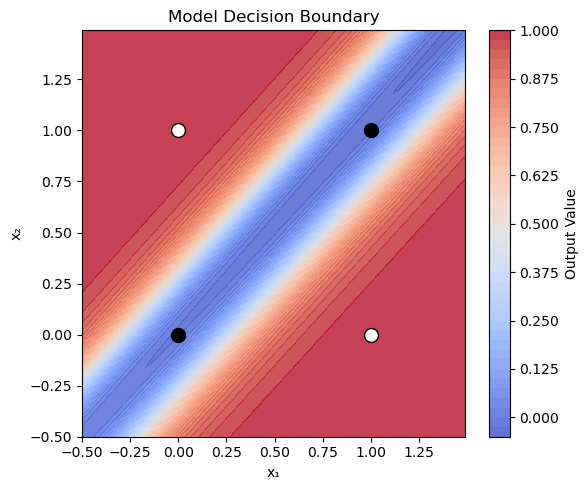

In [50]:
plot_decision_boundary(model)

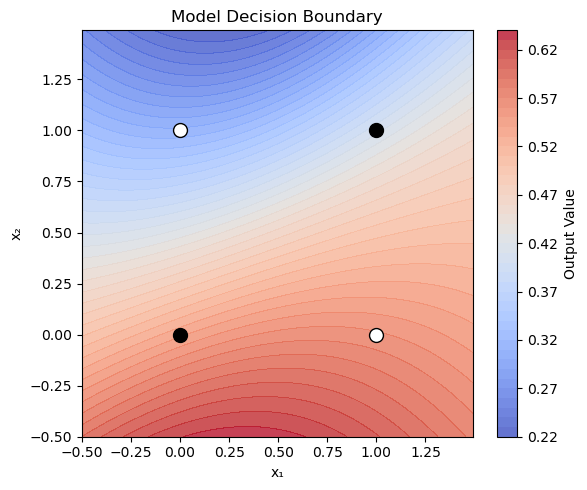

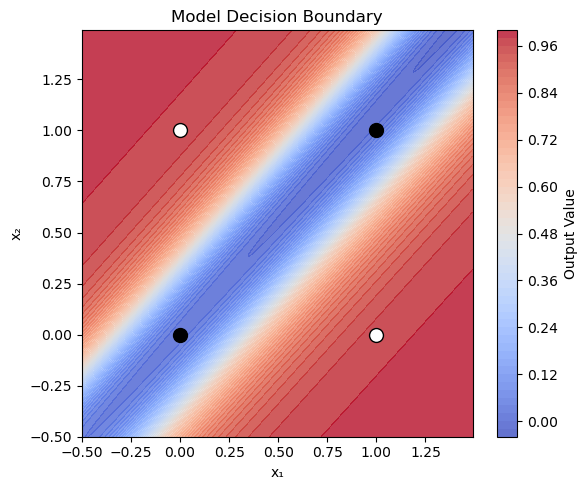

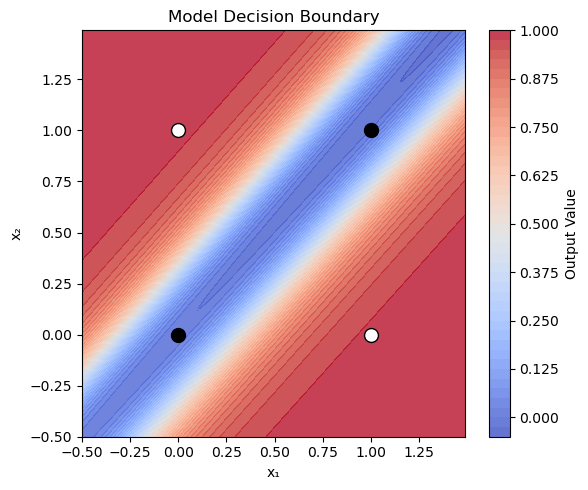

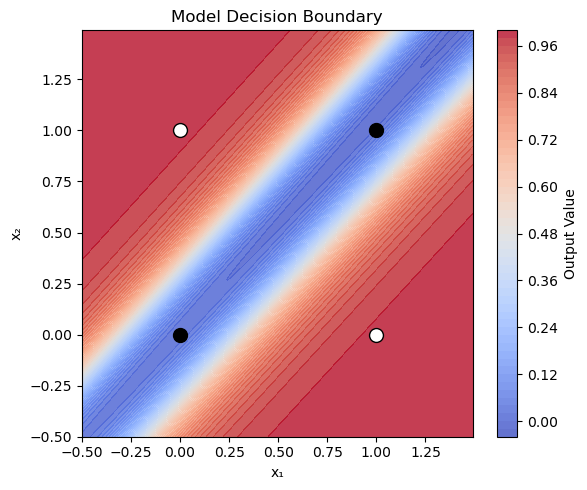

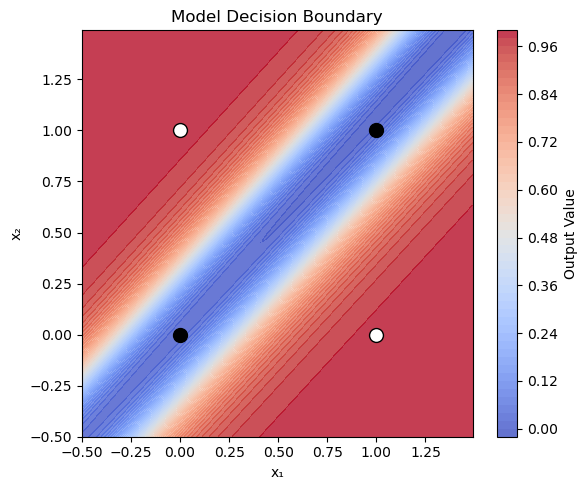

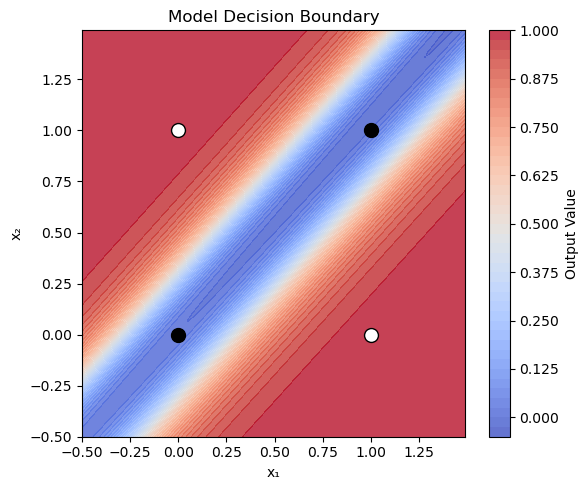

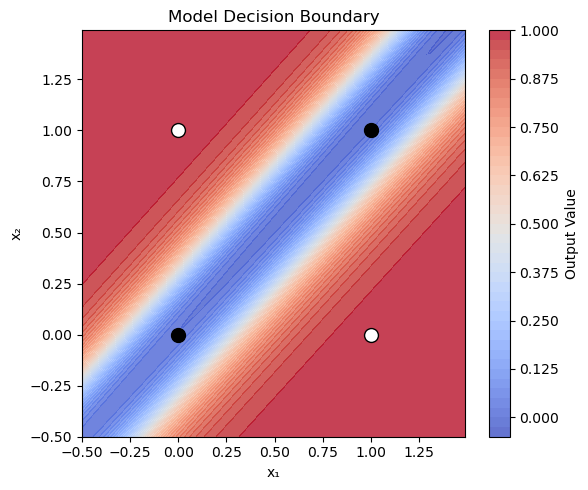

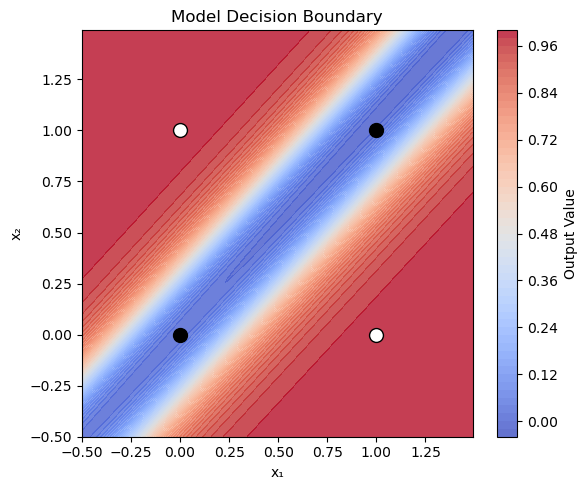

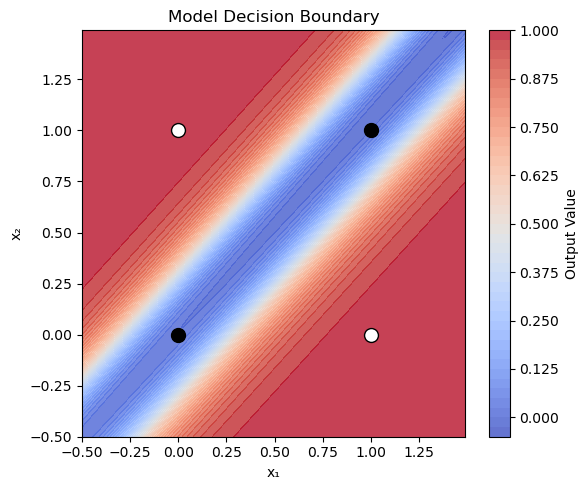

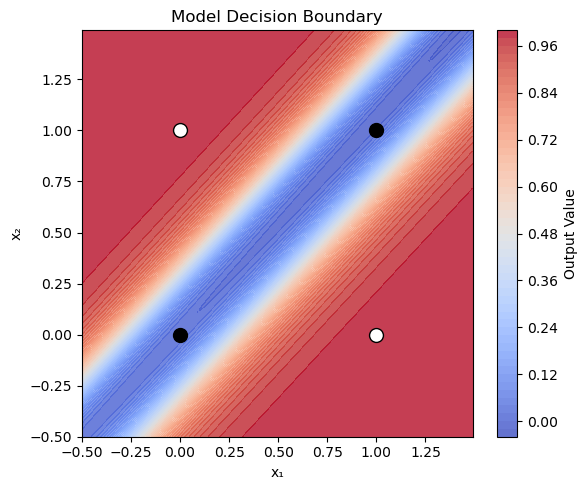

In [51]:
for epoch, params in checkpoints.items():
    # set weights back
    for p, val in zip(model.parameters(), params):
        p.data = val
    plot_decision_boundary(model)


experiment 2 changing the activation to sigmoid

In [52]:
import math
import random

# --- assuming you have your Value, Layer, Sequential, Tanh defined as above ---

# 1. Define model
model = Sequential(
    Layer(2, 2),
    Sigmoid(),
    Layer(2, 1),
    Sigmoid()
)

# 2. Define dataset
data = [
    ([0.0, 0.0], [0.0]),
    ([0.0, 1.0], [1.0]),
    ([1.0, 0.0], [1.0]),
    ([1.0, 1.0], [0.0]),
]

# 3. Training parameters
epochs = 10000
learning_rate = 0.1
checkpoints = {}
loss_history = []
# 4. Training loop
for epoch in range(epochs):
    total_loss = 0.0


    # Zero gradients
    for p in model.parameters():
        p.grad = 0.0

    losses = []
    # Forward + compute loss
    for x, y_true in data:
        y_pred = model([Value(xi) for xi in x])  # forward pass
        loss = sum((y_pred_i - y_true_i)**2 for y_pred_i, y_true_i in zip(y_pred, y_true))  # MSE
        total_loss += loss.data
        losses.append(loss)
        loss_history.append(loss.data)
        # Backward (autograd)

      # total_batch_loss = sum(losses, Value(0.0))
      # total_batch_loss.backward()

        loss.backward()
        # Gradient descent step
        for p in model.parameters():
            p.data -= learning_rate * p.grad

    # Logging
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss={total_loss:.4f}")
        checkpoints[epoch] = [v.data for v in model.parameters()]

# 5. Evaluation
print("\nFinal outputs:")
for x, y_true in data:
    y_pred = model([Value(xi) for xi in x])
    print(f"{x} -> {y_pred[0].data:.4f} (target {y_true[0]})")


Epoch 0: loss=1.0198
Epoch 1000: loss=0.7701
Epoch 2000: loss=0.2447
Epoch 3000: loss=0.0185
Epoch 4000: loss=0.0084
Epoch 5000: loss=0.0053
Epoch 6000: loss=0.0039
Epoch 7000: loss=0.0030
Epoch 8000: loss=0.0025
Epoch 9000: loss=0.0021

Final outputs:
[0.0, 0.0] -> 0.0126 (target 0.0)
[0.0, 1.0] -> 0.9819 (target 1.0)
[1.0, 0.0] -> 0.9794 (target 1.0)
[1.0, 1.0] -> 0.0301 (target 0.0)


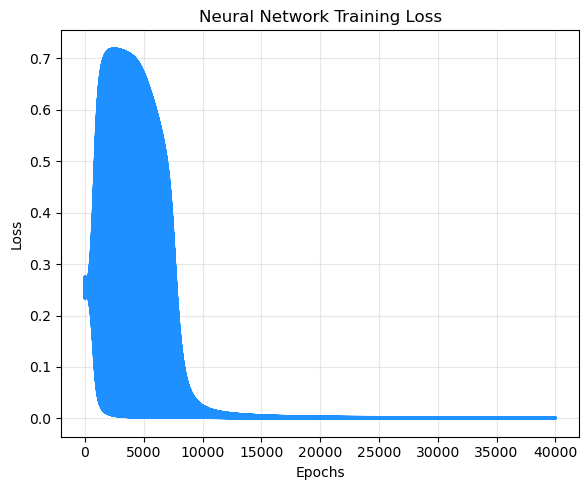

In [53]:
plot_loss_curve(loss_history)

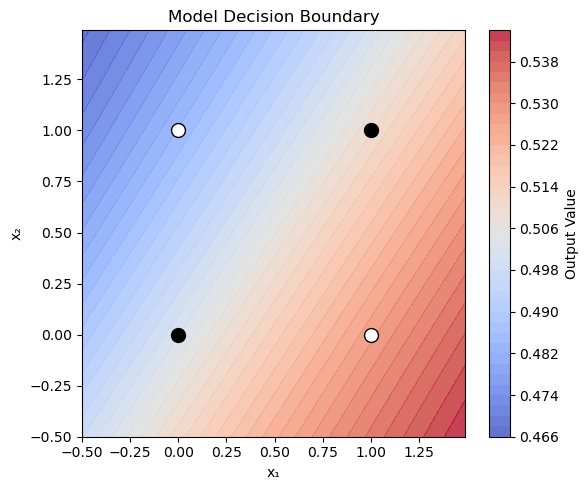

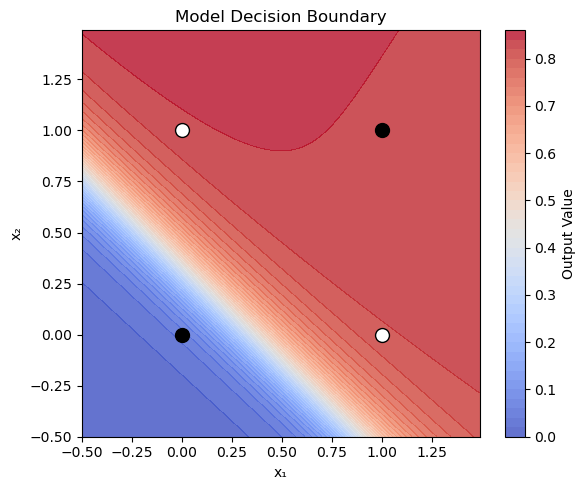

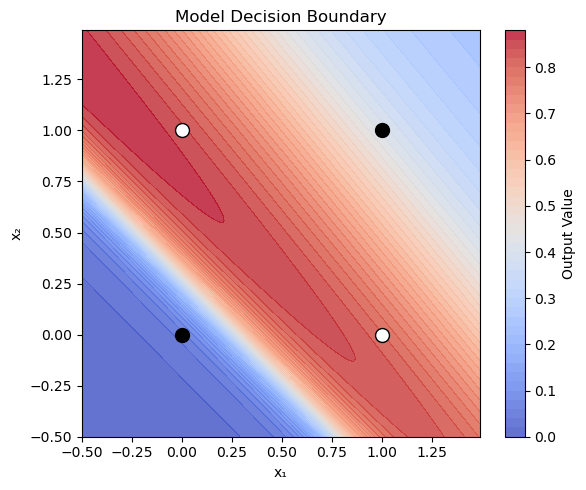

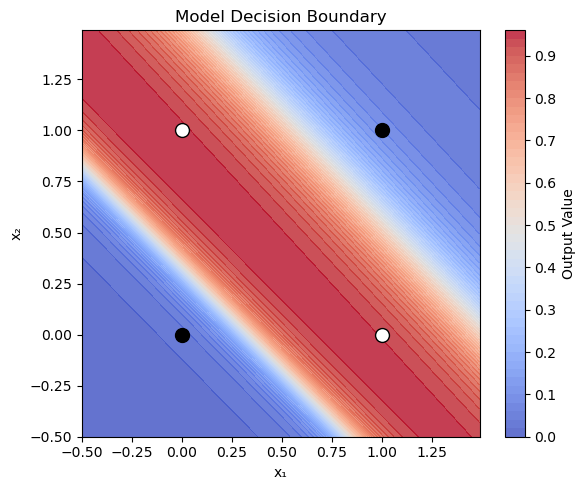

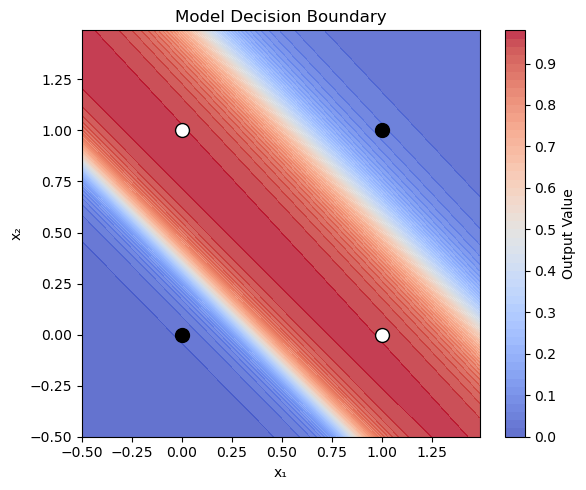

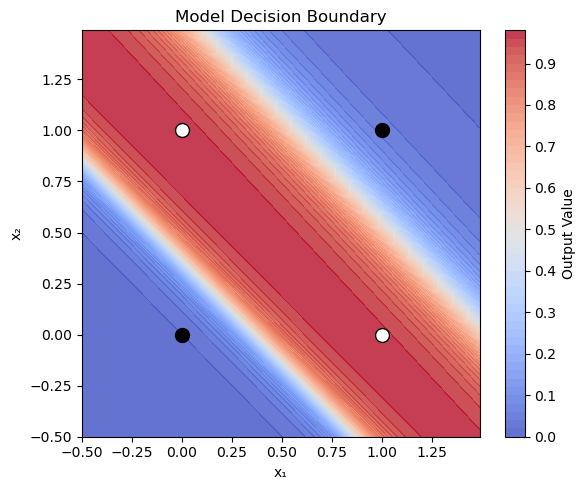

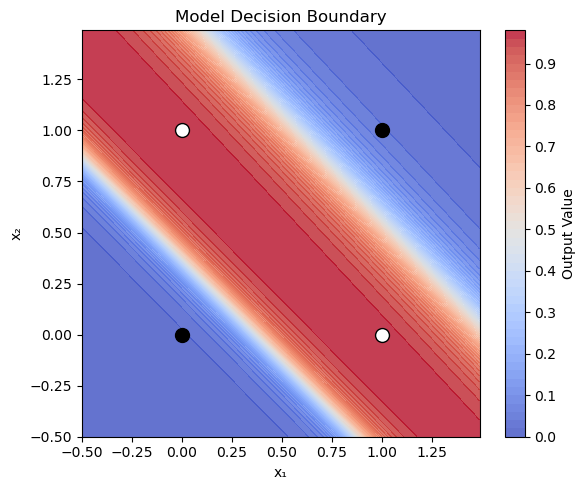

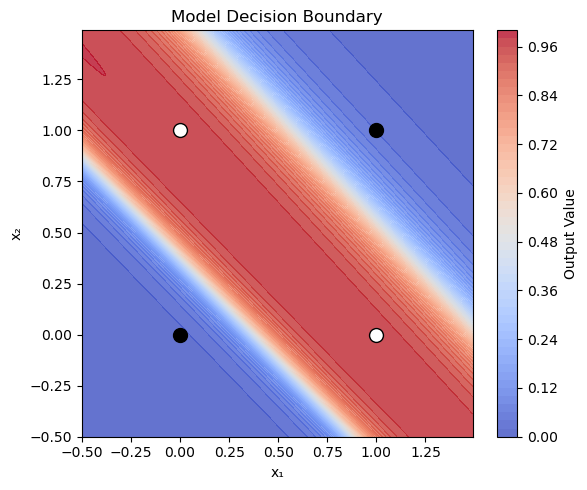

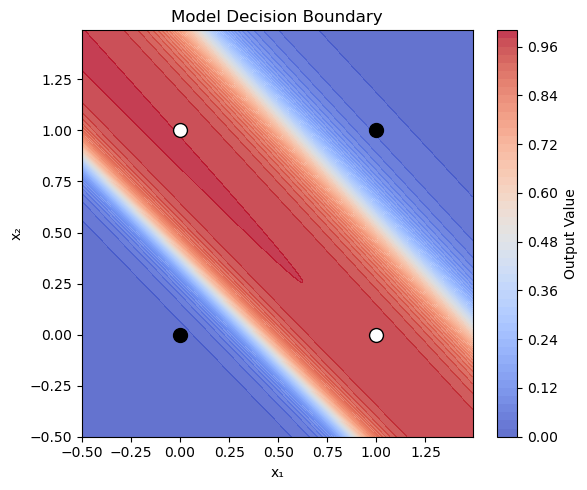

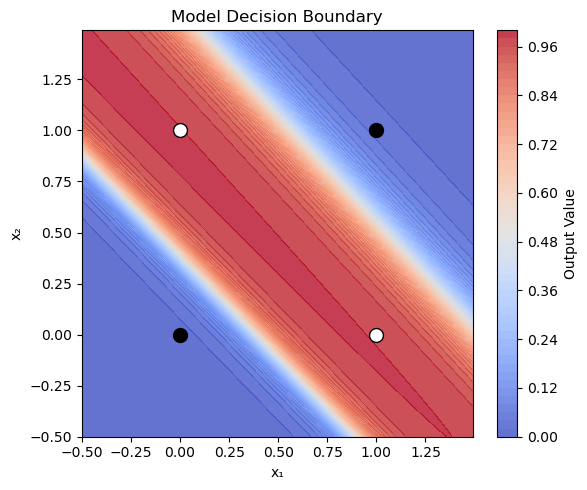

In [54]:
for epoch, params in checkpoints.items():
    # set weights back
    for p, val in zip(model.parameters(), params):
        p.data = val
    plot_decision_boundary(model)

falvours of gradient descent 
 - SGD
 - BDG


 | Mode                 | Batch size      | Weight update frequency | Pros                             | Cons                              |
| -------------------- | --------------- | ----------------------- | -------------------------------- | --------------------------------- |
| **Stochastic (SGD)** | 1               | After every sample      | Noisy updates → good exploration | Can oscillate / slow converge     |
| **Mini-batch**       | 8–128 (typical) | After each mini-batch   | Good balance                     | Industry default                  |
| **Batch**            | All samples     | Once per epoch          | Smooth updates                   | High memory cost, slower learning |


In [55]:
# SGD
for epoch in range(epochs):
    random.shuffle(data)
    total_loss = 0.0

    for x, y_true in data:
        # forward
        y_pred = model([Value(xi) for xi in x])
        loss = sum((y_pred_i - y_true_i)**2 for y_pred_i, y_true_i in zip(y_pred, y_true))

        # zero grads
        for p in model.parameters():
            p.grad = 0.0

        # backward
        loss.backward()

        # update
        for p in model.parameters():
            p.data -= learning_rate * p.grad

        total_loss += loss.data


In [56]:
# mini batch 
for epoch in range(epochs):
    total_loss = 0.0
    for p in model.parameters(): p.grad = 0.0

    losses = []
    for x, y_true in data:
        y_pred = model([Value(xi) for xi in x])
        loss = sum((y_pred_i - y_true_i)**2 for y_pred_i, y_true_i in zip(y_pred, y_true))
        losses.append(loss)
        total_loss += loss.data

    total_batch_loss = sum(losses, Value(0.0))
    total_batch_loss.backward()  # single backward pass

    for p in model.parameters():
        p.data -= learning_rate * p.grad

🧩 Model Structure (2 → 2 → 1)

Your network:

Layer(2, 2)
Sigmoid()
Layer(2, 1)
Sigmoid()

Layers & Neurons
Layer	Input Features	Output Neurons	Total Neurons So Far	Parameters
Input Layer	2	—	—	—
Hidden Layer	2	2	2	(2×2 + 2×1) = 6
Output Layer	2	1	3 total	(1×2 + 1×1) = 3

➡️ Total: 3 neurons, 9 trainable parameters (6 weights + 3 biases).

⚙️ In SGD

Each training example ([x₁, x₂] → y) is processed one at a time.

Each neuron performs a dot product (w·x + b) → then passes through Sigmoid().

Gradients are computed for that one sample and weights are updated immediately.

No batch matrix multiplication — just scalar and vector ops.

🧮 Matrix View

If done in batch mode (4 samples at once):

Input X: (4×2)
Weights W1: (2×2)
Output Hidden: (4×2)
Weights W2: (2×1)
Final Output: (4×1)


But in SGD, each input is a (1×2) vector → producing scalar outputs at each step.

✅ Summary

You have a 2–2–1 MLP = 3 neurons total.

SGD = one input sample per weight update.

No explicit matrix multiplication (loop-based dot products instead).

Backprop still works via your autograd system.

Lets add opimizers to the MLP


We’ll go step by step, building intuition → math → code → comparison.
Your current code uses plain Gradient Descent.

🧠 Step 1: Recap — What is Gradient Descent?

For each parameter 
𝜃
θ:

𝜃
=
𝜃
−
𝜂
⋅
∇
𝜃
𝐿
θ=θ−η⋅∇
θ
	​

L

𝜂
η: learning rate

∇
𝜃
𝐿
∇
θ
	​

L: gradient of loss wrt that parameter

👉 Works fine, but:

very noisy updates,

can oscillate,

slow convergence in ravines.

⚙️ Step 2: Momentum — adding “inertia”

Instead of moving directly opposite the gradient each step, we give updates velocity.

𝑣
𝑡
=
𝛽
𝑣
𝑡
−
1
+
(
1
−
𝛽
)
∇
𝜃
𝐿
𝑡
v
t
	​

=βv
t−1
	​

+(1−β)∇
θ
	​

L
t
	​

𝜃
𝑡
=
𝜃
𝑡
−
1
−
𝜂
𝑣
𝑡
θ
t
	​

=θ
t−1
	​

−ηv
t
	​


𝑣
𝑡
v
t
	​

: exponentially averaged past gradients

𝛽
β: momentum term (typically 0.9)

🧠 Intuition: Think of a ball rolling downhill.
It builds speed (momentum) in consistent directions and smooths out noise.

🧮 Step 3: Adam — adaptive + momentum

Adam combines:

Momentum on gradients

Adaptive learning rates using gradient magnitudes

𝑚
𝑡
=
𝛽
1
𝑚
𝑡
−
1
+
(
1
−
𝛽
1
)
∇
𝜃
𝐿
𝑡
m
t
	​

=β
1
	​

m
t−1
	​

+(1−β
1
	​

)∇
θ
	​

L
t
	​

𝑣
𝑡
=
𝛽
2
𝑣
𝑡
−
1
+
(
1
−
𝛽
2
)
(
∇
𝜃
𝐿
𝑡
)
2
v
t
	​

=β
2
	​

v
t−1
	​

+(1−β
2
	​

)(∇
θ
	​

L
t
	​

)
2
𝑚
^
𝑡
=
𝑚
𝑡
1
−
𝛽
1
𝑡
,
𝑣
^
𝑡
=
𝑣
𝑡
1
−
𝛽
2
𝑡
m
^
t
	​

=
1−β
1
t
	​

m
t
	​

	​

,
v
^
t
	​

=
1−β
2
t
	​

v
t
	​

	​

𝜃
𝑡
=
𝜃
𝑡
−
1
−
𝜂
𝑚
^
𝑡
𝑣
^
𝑡
+
𝜖
θ
t
	​

=θ
t−1
	​

−η
v
^
t
	​

	​

+ϵ
m
^
t
	​

	​


Defaults:

𝛽
1
=
0.9
,
𝛽
2
=
0.999
,
𝜖
=
10
−
8
β
1
	​

=0.9,β
2
	​

=0.999,ϵ=10
−8

🧠 Intuition:

Keeps velocity like Momentum.

Scales learning rate per parameter — big gradients get smaller steps, small ones get larger steps.

In [57]:
class SGD:
    def __init__(self, parameters, lr=0.01):
        self.parameters = parameters
        self.lr = lr

    def step(self):
        for p in self.parameters:
            p.data -= self.lr * p.grad

    def zero_grad(self):
        for p in self.parameters:
            p.grad = 0.0


class Momentum:
    def __init__(self, parameters, lr=0.01, beta=0.9):
        self.parameters = parameters
        self.lr = lr
        self.beta = beta
        self.v = {id(p): 0.0 for p in parameters}

    def step(self):
        for p in self.parameters:
            self.v[id(p)] = self.beta * self.v[id(p)] + (1 - self.beta) * p.grad
            p.data -= self.lr * self.v[id(p)]

    def zero_grad(self):
        for p in self.parameters:
            p.grad = 0.0


class Adam:
    def __init__(self, parameters, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.parameters = parameters
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = {id(p): 0.0 for p in parameters}
        self.v = {id(p): 0.0 for p in parameters}
        self.t = 0

    def step(self):
        self.t += 1
        for p in self.parameters:
            g = p.grad
            pid = id(p)
            self.m[pid] = self.beta1 * self.m[pid] + (1 - self.beta1) * g
            self.v[pid] = self.beta2 * self.v[pid] + (1 - self.beta2) * (g * g)

            m_hat = self.m[pid] / (1 - self.beta1 ** self.t)
            v_hat = self.v[pid] / (1 - self.beta2 ** self.t)
            p.data -= self.lr * m_hat / ((v_hat ** 0.5) + self.eps)

    def zero_grad(self):
        for p in self.parameters:
            p.grad = 0.0


Epoch 0: loss=1.3518
Epoch 1000: loss=0.0009
Epoch 2000: loss=0.0004
Epoch 3000: loss=0.0002
Epoch 4000: loss=0.0002
Epoch 5000: loss=0.0001
Epoch 6000: loss=0.0001
Epoch 7000: loss=0.0001
Epoch 8000: loss=0.0001
Epoch 9000: loss=0.0001


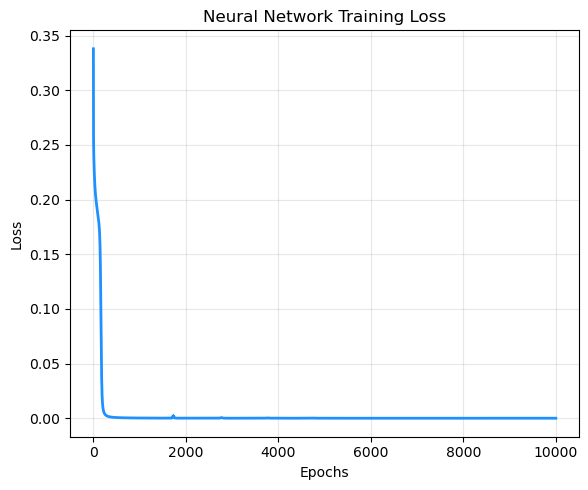

In [58]:
# training
model = Sequential(
    Layer(2, 2),
    Tanh(),
    Layer(2, 1),
    Tanh()
)

data = [
    ([0.0, 0.0], [0.0]),
    ([0.0, 1.0], [1.0]),
    ([1.0, 0.0], [1.0]),
    ([1.0, 1.0], [0.0]),
]

# opt = Adam(model.parameters(), lr=0.01)
# opt = Momentum(model.parameters(), lr=0.01)
opt = SGD(model.parameters(), lr=0.1)
loss_history = []
checkpoints = {}
for epoch in range(epochs):
    total_loss = 0
    opt.zero_grad()

    for x, y_true in data:
        y_pred = model([Value(xi) for xi in x])
        loss = sum((y_pred_i - y_true_i)**2 for y_pred_i, y_true_i in zip(y_pred, y_true))

        opt.zero_grad()
        loss.backward()
        opt.step()

        total_loss += loss.data
    loss_history.append(total_loss/len(data))


    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss={total_loss:.4f}")
        checkpoints[epoch] = [v.data for v in model.parameters()]


plot_loss_curve(loss_history)



🧠 Step 2: From Value to Tensor

In deep learning:

Scalar → 0D tensor (shape = ())

Vector → 1D tensor (shape = (n,))

Matrix → 2D tensor (shape = (n, m))

Batch of matrices → 3D tensor (shape = (b, n, m))

We’ll start by replacing Value with Tensor, but we’ll still preserve the ability to do autograd.

That means — every operation (+, *, @, etc.) will:

Compute the forward pass (like before)

Record the operation and parents for backward pass

In [59]:
import numpy as np

class Tensor:
    def __init__(self, data, requires_grad=True):
        self.data = np.array(data, dtype=float)
        self.grad = np.zeros_like(self.data)
        self.requires_grad = requires_grad
        self._backward = lambda: None
        self._prev = set()

    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data)

        def _backward():
            if self.requires_grad:
                grad_self = out.grad
                while np.ndim(grad_self) > np.ndim(self.data):
                    grad_self = grad_self.sum(axis=0)
                for i, dim in enumerate(self.data.shape):
                    if dim == 1:
                        grad_self = grad_self.sum(axis=i, keepdims=True)
                self.grad += grad_self

            if other.requires_grad:
                grad_other = out.grad
                while np.ndim(grad_other) > np.ndim(other.data):
                    grad_other = grad_other.sum(axis=0)
                for i, dim in enumerate(other.data.shape):
                    if dim == 1:
                        grad_other = grad_other.sum(axis=i, keepdims=True)
                other.grad += grad_other

        out._backward = _backward
        out._prev = {self, other}
        return out

    def __matmul__(self, other):  # matrix multiplication
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data @ other.data)

        def _backward():
            if self.requires_grad:
                self.grad += out.grad @ other.data.T
            if other.requires_grad:
                other.grad += self.data.T @ out.grad
        out._backward = _backward
        out._prev = {self, other}
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = np.ones_like(self.data)
        for v in reversed(topo):
            v._backward()


In [60]:
# Simple test
a = Tensor([[1, 2], [3, 4]])
b = Tensor([[2], [1]])
c = a @ b
d = c + 1
d.backward()

print("c:", c.data)
print("a.grad:", a.grad)
print("b.grad:", b.grad)


c: [[ 4.]
 [10.]]
a.grad: [[2. 1.]
 [2. 1.]]
b.grad: [[4.]
 [6.]]


In [61]:
d.data

array([[ 5.],
       [11.]])

In [62]:
type(c)

__main__.Tensor

In [63]:
# Set NumPy print options (this is global for NumPy arrays)
np.set_printoptions(
    formatter={'float': '{: 6.3f}'.format}, # Format as 6 characters wide, 3 decimal places
    suppress=True,                          # Suppress scientific notation
    linewidth=100
)

In [ ]:
import numpy as np

class Tensor:
    def __init__(self, data, _children=(), _op='', requires_grad=True):
        self.data = np.array(data, dtype=np.float32)
        self.requires_grad = requires_grad
        self.grad = np.zeros_like(self.data)
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

    # ---- Core ops ----
    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, (self, other), '+')

        def _backward():
            if self.requires_grad:
                grad_self = out.grad
                while np.ndim(grad_self) > np.ndim(self.data):
                    grad_self = grad_self.sum(axis=0)
                for i, dim in enumerate(self.data.shape):
                    if dim == 1:
                        grad_self = grad_self.sum(axis=i, keepdims=True)
                self.grad += grad_self

            if other.requires_grad:
                grad_other = out.grad
                while np.ndim(grad_other) > np.ndim(other.data):
                    grad_other = grad_other.sum(axis=0)
                for i, dim in enumerate(other.data.shape):
                    if dim == 1:
                        grad_other = grad_other.sum(axis=i, keepdims=True)
                other.grad += grad_other

        out._backward = _backward
        return out
        

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, (self, other), '*')

        def _backward():
            if self.requires_grad:
                self.grad += out.grad * other.data
            if other.requires_grad:
                other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __matmul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data @ other.data, (self, other), '@')

        def _backward():
            if self.requires_grad:
                self.grad += out.grad @ other.data.T
            if other.requires_grad:
                other.grad += self.data.T @ out.grad

        out._backward = _backward
        return out

    # ---- Unary ops ----
    def tanh(self):
        out = Tensor(np.tanh(self.data), (self,), 'tanh')

        def _backward():
            if self.requires_grad:
                self.grad += (1 - out.data ** 2) * out.grad
        out._backward = _backward
        return out

    def relu(self):
        out = Tensor(np.maximum(0, self.data), (self,), 'relu')

        def _backward():
            if self.requires_grad:
                self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out

    # ---- Backprop ----
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = np.ones_like(self.data)

        for v in reversed(topo):
            print(f"Backpropagating through {v._op} on ")
            print(v.data)
            v._backward()


In [65]:
# Simple test
a = Tensor([[1, 2], [3, 4]])
b = Tensor([[2], [1]])
c = a @ b
d = c + 1
d.backward()

print("c:")
print(c.data)
print("a.grad:")
print(a.grad)
print("b.grad:")
print(b.grad)


Backpropagating through + on 
[[ 5.000]
 [ 11.000]]
Backpropagating through @ on 
[[ 4.000]
 [ 10.000]]
Backpropagating through  on 
[[ 1.000  2.000]
 [ 3.000  4.000]]
Backpropagating through  on 
[[ 2.000]
 [ 1.000]]
Backpropagating through  on 
1.0
c:
[[ 4.000]
 [ 10.000]]
a.grad:
[[ 2.000  1.000]
 [ 2.000  1.000]]
b.grad:
[[ 4.000]
 [ 6.000]]


In [66]:
# Forward
x = Tensor(2.0, requires_grad=False)   # input
w = Tensor(3.0, requires_grad=True)    # weight
y = w * x
loss = (y - 10)**2

# Backward
loss.backward()

print(w.grad)   # ✅ has gradient
print(x.grad)   # ❌ None, because requires_grad=False


TypeError: unsupported operand type(s) for -: 'Tensor' and 'int'

In [67]:
import numpy as np

class Tensor:
    def __init__(self, data, _children=(), _op='', requires_grad=True):
        self.data = np.array(data, dtype=np.float32)
        self.requires_grad = requires_grad
        self.grad = np.zeros_like(self.data)
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

    # ---- Core ops ----
    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, (self, other), '+')

        def _backward():
            if self.requires_grad:
                grad_self = out.grad
                while np.ndim(grad_self) > np.ndim(self.data):
                    grad_self = grad_self.sum(axis=0)
                for i, dim in enumerate(self.data.shape):
                    if dim == 1:
                        grad_self = grad_self.sum(axis=i, keepdims=True)
                self.grad += grad_self

            if other.requires_grad:
                grad_other = out.grad
                while np.ndim(grad_other) > np.ndim(other.data):
                    grad_other = grad_other.sum(axis=0)
                for i, dim in enumerate(other.data.shape):
                    if dim == 1:
                        grad_other = grad_other.sum(axis=i, keepdims=True)
                other.grad += grad_other

        out._backward = _backward
        return out
        
    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        return self + (-other)

    def __rsub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        return other + (-self)

    def __pow__(self, power):
        assert isinstance(power, (int, float))
        out = Tensor(self.data ** power, (self,), f'pow({power})')

        def _backward():
            if self.requires_grad:
                self.grad += (power * self.data ** (power - 1)) * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, (self, other), '*')

        def _backward():
            if self.requires_grad:
                self.grad += out.grad * other.data
            if other.requires_grad:
                other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __matmul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data @ other.data, (self, other), '@')

        def _backward():
            if self.requires_grad:
                self.grad += out.grad @ other.data.T
            if other.requires_grad:
                other.grad += self.data.T @ out.grad

        out._backward = _backward
        return out

    # ---- Unary ops ----
    def tanh(self):
        out = Tensor(np.tanh(self.data), (self,), 'tanh')

        def _backward():
            if self.requires_grad:
                self.grad += (1 - out.data ** 2) * out.grad
        out._backward = _backward
        return out

    def relu(self):
        out = Tensor(np.maximum(0, self.data), (self,), 'relu')

        def _backward():
            if self.requires_grad:
                self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out

    # ---- Backprop ----
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = np.ones_like(self.data)

        for v in reversed(topo):
            print(f"Backpropagating through {v._op} on ")
            print(v.data)
            v._backward()


In [68]:
x = Tensor(2.0, requires_grad=False)
w = Tensor(3.0, requires_grad=True)
y = w * x
loss = (y - 10)**2
loss.backward()

print(w.grad)   # should be a number
print(x.grad)   # should remain 0 (requires_grad=False)


Backpropagating through pow(2) on 
16.0
Backpropagating through + on 
-4.0
Backpropagating through * on 
-10.0
Backpropagating through  on 
10.0
Backpropagating through  on 
-1.0
Backpropagating through * on 
6.0
Backpropagating through  on 
2.0
Backpropagating through  on 
3.0
-16.0
0.0


adding more functions to Tensor class

In [159]:
import numpy as np

class Tensor:
    def __init__(self, data, _children=(), _op='', requires_grad=True):
        self.data = np.array(data, dtype=np.float32)
        self.requires_grad = requires_grad
        self.grad = np.zeros_like(self.data)
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

    # ---- Core ops ----
    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, (self, other), '+')

        def _backward():
            if self.requires_grad:
                grad_self = out.grad
                while np.ndim(grad_self) > np.ndim(self.data):
                    grad_self = grad_self.sum(axis=0)
                for i, dim in enumerate(self.data.shape):
                    if dim == 1:
                        grad_self = grad_self.sum(axis=i, keepdims=True)
                self.grad += grad_self

            if other.requires_grad:
                grad_other = out.grad
                while np.ndim(grad_other) > np.ndim(other.data):
                    grad_other = grad_other.sum(axis=0)
                for i, dim in enumerate(other.data.shape):
                    if dim == 1:
                        grad_other = grad_other.sum(axis=i, keepdims=True)
                other.grad += grad_other

        out._backward = _backward
        return out
        
    def __neg__(self): 
        return self * -1

    def __sub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        return self + (-other)

    def __rsub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        return other + (-self)

    def __pow__(self, power):
        assert isinstance(power, (int, float))
        out = Tensor(self.data ** power, (self,), f'pow({power})')

        def _backward():
            if self.requires_grad:
                self.grad += (power * self.data ** (power - 1)) * out.grad

        out._backward = _backward
        return out

    def __truediv__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data / other.data, (self, other), '/')

        def _backward():
            if self.requires_grad:
                self.grad += out.grad / other.data
            if other.requires_grad:
                other.grad += -out.grad * self.data / (other.data ** 2)

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, (self, other), '*')

        def _backward():
            if self.requires_grad:
                self.grad += out.grad * other.data
            if other.requires_grad:
                other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __matmul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data @ other.data, (self, other), '@')

        def _backward():
            if self.requires_grad:
                self.grad += out.grad @ other.data.T
            if other.requires_grad:
                other.grad += self.data.T @ out.grad

        out._backward = _backward
        return out

    # ---- Unary ops ----
    def tanh(self):
        out = Tensor(np.tanh(self.data), (self,), 'tanh')

        def _backward():
            if self.requires_grad:
                self.grad += (1 - out.data ** 2) * out.grad
        out._backward = _backward
        return out

    def relu(self):
        out = Tensor(np.maximum(0, self.data), (self,), 'relu')

        def _backward():
            if self.requires_grad:
                self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out
    
    def sum(self, axis=None, keepdims=False):
        out = Tensor(self.data.sum(axis=axis, keepdims=keepdims), (self,), 'sum')

        def _backward():
            if self.requires_grad:
                # Gradient of sum is 1 broadcast to original shape
                grad = out.grad
                if axis is not None and not keepdims:
                    grad = np.expand_dims(grad, axis)
                
                self.grad += np.ones_like(self.data) * grad

        out._backward = _backward
        return out

    def mean(self, axis=None, keepdims=False):
        divisor = self.data.size if axis is None else self.data.shape[axis]

        out = Tensor(self.data.mean(axis=axis, keepdims=keepdims), (self,), 'mean')

        def _backward():
            if self.requires_grad:
                grad = out.grad / divisor
                if axis is not None and not keepdims:
                    grad = np.expand_dims(grad, axis)
                self.grad += np.ones_like(self.data) * grad

        out._backward = _backward
        return out

    def exp(self):
        out = Tensor(np.exp(self.data), (self,), 'exp')

        def _backward():
            if self.requires_grad:
                self.grad += out.data * out.grad

        out._backward = _backward
        return out

    def sigmoid(self):
        sig = 1 / (1 + np.exp(-self.data))
        out = Tensor(sig, (self,), 'sigmoid')

        def _backward():
            if self.requires_grad:
                self.grad += sig * (1 - sig) * out.grad

        out._backward = _backward
        return out

    def log(self):
        out = Tensor(np.log(self.data), (self,), 'log')

        def _backward():
            if self.requires_grad:
                self.grad += (1 / self.data) * out.grad

        out._backward = _backward
        return out
    

    def clamp(self, min_val, max_val):
        clamped = np.clip(self.data, min_val, max_val)
        out = Tensor(clamped, (self,), 'clamp')

        def _backward():
            if self.requires_grad:
                mask = (self.data >= min_val) & (self.data <= max_val)
                self.grad += out.grad * mask

        out._backward = _backward
        return out

    def softmax(self, axis=-1):
        # stable softmax
        shifted = self.data - np.max(self.data, axis=axis, keepdims=True)
        exps = np.exp(shifted)
        out_data = exps / np.sum(exps, axis=axis, keepdims=True)

        out = Tensor(out_data, (self,), 'softmax')

        def _backward():
            if not self.requires_grad:
                return

            # Jacobian-vector product
            grad = out.grad
            sm = out.data
            sum_j = np.sum(grad * sm, axis=axis, keepdims=True)
            self.grad += sm * (grad - sum_j)

        out._backward = _backward
        return out

    def log_softmax(self, axis=-1):
        # numerically stable log-softmax
        shifted = self.data - np.max(self.data, axis=axis, keepdims=True)
        exps = np.exp(shifted)
        sum_exps = np.sum(exps, axis=axis, keepdims=True)

        out_data = shifted - np.log(sum_exps)  # log_softmax outputs

        out = Tensor(out_data, (self,), 'log_softmax')

        def _backward():
            if not self.requires_grad:
                return

            # softmax = exp(log_softmax)
            softmax_output = np.exp(out_data)
            grad_out = out.grad

            # vectorized Jacobian for log_softmax:
            # dL/dx = grad_out - softmax * sum(grad_out)
            sum_grad = np.sum(grad_out, axis=axis, keepdims=True)
            grad_self = grad_out - softmax_output * sum_grad

            self.grad += grad_self

        out._backward = _backward
        return out


    # ---- Backprop ----
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = np.ones_like(self.data)

        for v in reversed(topo):
            print(f"Backpropagating through {v._op} on ")
            print(v.data)
            v._backward()


In [85]:
xx = Tensor([1,1])

In [86]:
xx.__dict__

{'data': array([ 1.000,  1.000], dtype=float32),
 'requires_grad': True,
 'grad': array([ 0.000,  0.000], dtype=float32),
 '_backward': <function __main__.Tensor.__init__.<locals>.<lambda>()>,
 '_prev': set(),
 '_op': ''}

In [88]:
print(xx,xx.data)
y = xx.sum()
# dy/dx = 1 for every element in x

Tensor(data=[ 1.000  1.000], grad=[ 0.000  0.000]) [ 1.000  1.000]


In [89]:
xx = Tensor([1,1])
print(xx, xx.data)

y = xx.sum()
print("y:", y.data)

y.backward()

print("xx.grad:", xx.grad)

Tensor(data=[ 1.000  1.000], grad=[ 0.000  0.000]) [ 1.000  1.000]
y: 2.0
Backpropagating through sum on 
2.0
Backpropagating through  on 
[ 1.000  1.000]
xx.grad: [ 1.000  1.000]


Loss class with static fucntions 

In [140]:
class Loss:
    @staticmethod
    def cross_entropy(logits, target_index):
        log_probs = logits.log_softmax()
        return -log_probs[target_index]

    @staticmethod
    def mse(pred, target):
        diff = pred - target
        return (diff * diff).mean()


    
    @staticmethod
    def binary_cross_entropy(pred, target):
        """
        pred: Tensor, probability after sigmoid
        target: Tensor or scalar 0/1
        """

        eps = 1e-12  # for numerical stability
        pred = pred.clamp(eps, 1 - eps)  # avoid log(0)


        # ensure target is a Tensor
        if not isinstance(target, Tensor):
            target = Tensor(np.array(target), requires_grad=False)

        loss = -(target * pred.log() + (1 - target) * (1 - pred).log())
        return loss.mean()


Optim class with same design

In [93]:
class Optim:
    @staticmethod
    def zero_grad(params):
        for p in params:
            p.grad = np.zeros_like(p.grad)

    @staticmethod
    def sgd(params, lr=0.01):
        for p in params:
            if p.requires_grad:
                p.data -= lr * p.grad


above is the bad design because we will have to store m and v in the tensor or state outside state mgmt

In [95]:
class Optim:
    def __init__(self, params, lr):
        self.param_groups = [{
            "params": list(params),
            "lr": lr
        }]
        self.state = {}   # param → state dict

    def zero_grad(self):
        for group in self.param_groups:
            for p in group["params"]:
                p.grad = np.zeros_like(p.grad)


In [143]:
class SGD(Optim):
    def __init__(self, params, lr=0.01):
        super().__init__(params, lr)

    def step(self):
        for group in self.param_groups:
            for p in group["params"]:
              if p.requires_grad:
                p.data -= group["lr"] * p.grad


In [96]:
class Momentum(Optim):
    def __init__(self, params, lr=0.01, momentum=0.9):
        super().__init__(params, lr)
        self.momentum = momentum

        for p in self.param_groups[0]["params"]:
            self.state[p] = {"velocity": np.zeros_like(p.data)}

    def step(self):
        for group in self.param_groups:
            lr = group["lr"]
            for p in group["params"]:
                v = self.state[p]["velocity"]
                v[:] = self.momentum * v + lr * p.grad
                p.data -= v

In [97]:
class Adam(Optim):
    def __init__(self, params, lr=0.001, b1=0.9, b2=0.999, eps=1e-8):
        super().__init__(params, lr)
        self.b1 = b1
        self.b2 = b2
        self.eps = eps

        for p in self.param_groups[0]["params"]:
            self.state[p] = {
                "m": np.zeros_like(p.data),
                "v": np.zeros_like(p.data),
                "t": 0
            }

    def step(self):
        for group in self.param_groups:
            lr = group["lr"]

            for p in group["params"]:
                st = self.state[p]

                st["t"] += 1
                g = p.grad

                # update biased estimates
                st["m"] = self.b1 * st["m"] + (1 - self.b1) * g
                st["v"] = self.b2 * st["v"] + (1 - self.b2) * (g * g)

                # bias correction
                m_hat = st["m"] / (1 - self.b1 ** st["t"])
                v_hat = st["v"] / (1 - self.b2 ** st["t"])

                # parameter update
                p.data -= lr * m_hat / (np.sqrt(v_hat) + self.eps)


Lets write a training loop using th components defined above but without the fancy training loop

In [100]:
W1 = Tensor(np.random.randn(2, 2)*0.1, requires_grad=True)
b1 = Tensor(np.zeros((1, 2)), requires_grad=True)

W2 = Tensor(np.random.randn(2, 1)*0.1, requires_grad=True)
b2 = Tensor(np.zeros((1, 1)), requires_grad=True)

# This is MLP(2 → 2 → 1).


In [101]:
def forward(x):
    h = (x @ W1 + b1).tanh()
    y = (h @ W2 + b2).tanh()
    return y


In [102]:
data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]


In [103]:
opt = Adam([W1, b1, W2, b2], lr=0.01)


In [104]:
epochs = 5000

for epoch in range(epochs):
    opt.zero_grad()
    total_loss = 0

    for x_np, y_np in data:
        x = Tensor(x_np, requires_grad=False)
        target = Tensor(y_np, requires_grad=False)

        pred = forward(x)
        loss = ((pred - target)**2).sum()   # MSE
        total_loss += loss.data

        loss.backward()

    opt.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss={total_loss}")


Backpropagating through sum on 
0.0
Backpropagating through pow(2) on 
[[ 0.000]]
Backpropagating through + on 
[[ 0.000]]
Backpropagating through tanh on 
[[ 0.000]]
Backpropagating through + on 
[[ 0.000]]
Backpropagating through @ on 
[[ 0.000]]
Backpropagating through tanh on 
[[ 0.000  0.000]]
Backpropagating through + on 
[[ 0.000  0.000]]
Backpropagating through @ on 
[[ 0.000  0.000]]
Backpropagating through  on 
[[ 0.146 -0.025]
 [ 0.034 -0.173]]
Backpropagating through  on 
[[ 0.000  0.000]]
Backpropagating through  on 
[[ 0.000  0.000]]
Backpropagating through  on 
[[-0.018]
 [-0.085]]
Backpropagating through  on 
[[ 0.000]]
Backpropagating through * on 
[[-0.000]]


ValueError: non-broadcastable output operand with shape () doesn't match the broadcast shape (1,1)

 Debugging the Backpropagation Error

The error occurs due to shape mismatch during backpropagation:
- `other.grad` is a scalar (shape `()`)
- `out.grad * self.data` is shape `(1,1)`
- NumPy can't add a `(1,1)` array to a scalar in-place

This happens because:
1. Forward pass uses broadcasting (e.g., `pred` is `(1,1)`, `target` is different shape)
2. Backward pass needs to handle un-broadcasting by summing gradients along broadcasted dimensions
3. PyTorch handles this automatically, but our custom autograd doesn't yet

To fix: When broadcasting occurs, sum gradients along the broadcasted dimensions


#### re-defining Tensor class with unbroadcast

In [162]:
import numpy as np

class Tensor:
    def __init__(self, data, _children=(), _op='', requires_grad=True):
        self.data = np.array(data, dtype=np.float64)
        self.requires_grad = requires_grad
        self.grad = np.zeros_like(self.data) if requires_grad else None
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

    # --- Helper: Unbroadcast gradient to target shape ---
    @staticmethod
    def _unbroadcast(grad, shape):
        """
        Sum grad to match 'shape' after broadcasting.
        grad: np.ndarray (upstream gradient)
        shape: tuple (target shape)
        """
        if grad is None:
            return None
        g = grad
        # sum extra leading dims
        while g.ndim > len(shape):
            g = g.sum(axis=0)
        # sum over dims that were broadcast (shape dim ==1)
        for i, dim in enumerate(shape):
            if dim == 1:
                g = g.sum(axis=i, keepdims=True)
        return g

    # ---- Core ops ----
    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data + other.data, (self, other), '+')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = Tensor._unbroadcast(out.grad, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = Tensor._unbroadcast(out.grad, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        return self + (-other)

    def __rsub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        return other + (-self)

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data * other.data, (self, other), '*')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = out.grad * other.data
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = out.grad * self.data
                grad_other = Tensor._unbroadcast(grad_other, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data / other.data, (self, other), '/')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = out.grad / other.data
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = -out.grad * self.data / (other.data ** 2)
                grad_other = Tensor._unbroadcast(grad_other, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    def __pow__(self, power):
        assert isinstance(power, (int, float))
        out = Tensor(self.data ** power, (self,), f'**{power}')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = (power * (self.data ** (power - 1))) * out.grad
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self

        out._backward = _backward
        return out

    def __matmul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data @ other.data, (self, other), '@')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                # out.grad shape is (m,p), other.data.T shape (p,n) => (m,n)
                grad_self = out.grad @ other.data.T
                # should already match self.data.shape
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = self.data.T @ out.grad
                grad_other = Tensor._unbroadcast(grad_other, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    # ---- Unary ops ----
    def tanh(self):
        out_data = np.tanh(self.data)
        out = Tensor(out_data, (self,), 'tanh')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += (1 - out_data ** 2) * out.grad

        out._backward = _backward
        return out

    def relu(self):
        out_data = np.maximum(0, self.data)
        out = Tensor(out_data, (self,), 'relu')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += (self.data > 0) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        out_data = np.exp(self.data)
        out = Tensor(out_data, (self,), 'exp')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += out_data * out.grad

        out._backward = _backward
        return out

    def log(self):
        out_data = np.log(self.data)
        out = Tensor(out_data, (self,), 'log')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += (1.0 / self.data) * out.grad

        out._backward = _backward
        return out

    def sigmoid(self):
        s = 1 / (1 + np.exp(-self.data))
        out = Tensor(s, (self,), 'sigmoid')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += s * (1 - s) * out.grad

        out._backward = _backward
        return out

    # ---- Reductions ----
    def sum(self, axis=None, keepdims=False):
        out_data = self.data.sum(axis=axis, keepdims=keepdims)
        out = Tensor(out_data, (self,), 'sum')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad = out.grad
                if axis is not None and not keepdims:
                    grad = np.expand_dims(grad, axis)
                self.grad += np.ones_like(self.data) * grad

        out._backward = _backward
        return out

    def mean(self, axis=None, keepdims=False):
        out_data = self.data.mean(axis=axis, keepdims=keepdims)

        # ensure array shape even if scalar
        out_data = np.array(out_data, dtype=np.float32)

        # divisor depends on axis
        if axis is None:
            divisor = self.data.size
        else:
            divisor = self.data.shape[axis]

        out = Tensor(out_data, (self,), 'mean')

        def _backward():
            if self.requires_grad:
                grad = out.grad / divisor

                # match reduced dimensions
                if axis is not None and not keepdims:
                    grad = np.expand_dims(grad, axis)

                # expand grad over original shape
                self.grad += np.ones_like(self.data) * grad

        out._backward = _backward
        return out

    
    def clamp(self, min_val, max_val):
        clamped = np.clip(self.data, min_val, max_val)
        out = Tensor(clamped, (self,), 'clamp')

        def _backward():
            if self.requires_grad:
                mask = (self.data >= min_val) & (self.data <= max_val)
                self.grad += out.grad * mask

        out._backward = _backward
        return out

    # ---- Backprop ----
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        # seed gradient for root (dL/dL = 1)
        if self.grad is None:
            self.grad = np.ones_like(self.data)
        else:
            self.grad = np.ones_like(self.data)

        for v in reversed(topo):
            v._backward()


In [130]:
# 1) broadcast mul scalar * matrix
x = Tensor(np.array([[1.0,2.0],[3.0,4.0]]))
y = Tensor(2.0)
z = (x * y).sum()
z.backward()
print("x.grad (should be 2):", x.grad)
print("y.grad (should be sum of x):", y.grad)

# 2) scalar / matrix
a = Tensor(2.0)
b = Tensor(np.array([[1.0,2.0]]))
c = (a / b).sum()
c.backward()
print("a.grad:", a.grad)
print("b.grad:", b.grad)

# 3) matmul scalar vs (1,1)
s = Tensor(np.array([[1.0]]))
r = Tensor(2.0)
m = (s * r).sum()
m.backward()
print("s.grad:", s.grad)
print("r.grad:", r.grad)

# 4) training sample case that failed earlier
x_np = np.array([[0.,1.]])
W1 = Tensor(np.random.randn(2,2)*0.1, requires_grad=True)
b1 = Tensor(np.zeros((1,2)), requires_grad=True)
W2 = Tensor(np.random.randn(2,1)*0.1, requires_grad=True)
b2 = Tensor(np.zeros((1,1)), requires_grad=True)

def forward_np(x):
    h = (x @ W1 + b1).tanh()
    y = (h @ W2 + b2).tanh()
    return y

x = Tensor(x_np, requires_grad=False)
y = forward_np(x)
loss = ((y - Tensor(np.array([[1.0]])))**2).sum()
loss.backward()
print("W1.grad shape:", W1.grad.shape, "W2.grad shape:", W2.grad.shape)


x.grad (should be 2): [[ 2.000  2.000]
 [ 2.000  2.000]]
y.grad (should be sum of x): 10.0
a.grad: 1.5
b.grad: [[-2.000 -0.500]]
s.grad: [[ 2.000]]
r.grad: 1.0
W1.grad shape: (2, 2) W2.grad shape: (2, 1)


Short explanation of the fix

Previously, when forward used broadcasting (e.g., scalar * matrix or (1,1) vs ()), the upstream gradient (out.grad) had a shape that didn’t match the original operand's .grad shape. NumPy in-place addition failed.

_unbroadcast collapses the gradient back to the original operand shape by summing extra leading dimensions and summing along axes that were expanded from 1 to N.

All binary ops now call _unbroadcast before accumulating into .grad, preventing the ValueError you saw.



trying to train again 

In [108]:
W1 = Tensor(np.random.randn(2, 2)*0.1, requires_grad=True)
b1 = Tensor(np.zeros((1, 2)), requires_grad=True)

W2 = Tensor(np.random.randn(2, 1)*0.1, requires_grad=True)
b2 = Tensor(np.zeros((1, 1)), requires_grad=True)



def forward(x):
    h = (x @ W1 + b1).tanh()
    y = (h @ W2 + b2).tanh()
    return y



data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]



opt = Adam([W1, b1, W2, b2], lr=0.01)



epochs = 5000

for epoch in range(epochs):
    opt.zero_grad()
    total_loss = 0

    for x_np, y_np in data:
        x = Tensor(x_np, requires_grad=False)
        target = Tensor(y_np, requires_grad=False)

        pred = forward(x)
        loss = ((pred - target)**2).sum()   # MSE
        total_loss += loss.data

        loss.backward()

    opt.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss={total_loss}")



Epoch 0, loss=1.9912815532244534
Epoch 1000, loss=0.005835648227820269
Epoch 2000, loss=0.0002395550985154225
Epoch 3000, loss=8.284414174652261e-05
Epoch 4000, loss=3.840658643428911e-05


now lets write it with fancy loop 

In [109]:
class Linear:
    def __init__(self, in_features, out_features):
        # Xavier init
        scale = (1.0 / in_features) ** 0.5
        self.W = Tensor.uniform(-scale, scale, (in_features, out_features))
        self.b = Tensor.zeros(out_features)

    def parameters(self):
        return [self.W, self.b]

    def __call__(self, x):
        return x @ self.W + self.b


In [110]:
class Trainer:
    def __init__(self, model, optimizer, loss_fn):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn

    def fit(self, dataloader, epochs=10):
        for epoch in range(1, epochs + 1):
            total_loss = 0.0
            steps = 0

            for x, y in dataloader:
                # Forward
                y_pred = self.model(x)

                # Loss
                loss = self.loss_fn(y_pred, y)

                # Backprop
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                total_loss += loss.data
                steps += 1

            avg_loss = total_loss / steps
            print(f"Epoch {epoch}/{epochs}  Loss: {avg_loss:.6f}")


✅ What is Xavier initialization (simple explanation)

Xavier initialization = picking weights so they are not too small (network doesn’t learn) and not too large (blows up gradients).

Formula (for fan_in = number of input features):

W ~ Normal(0, sqrt(1 / fan_in))


That’s it — just a scaled normal distribution.

So we can implement Xavier with:

scale = (1.0 / in_features) ** 0.5
W = np.random.randn(in_features, out_features) * scale


This works perfectly with your current system.

In [131]:
class Linear:
    def __init__(self, in_features, out_features):
        # Xavier initialization
        scale = (1.0 / in_features) ** 0.5
        W = np.random.randn(in_features, out_features) * scale
        b = np.zeros((1, out_features))

        self.W = Tensor(W, requires_grad=True)
        self.b = Tensor(b, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

    def __call__(self, x):
        return x @ self.W + self.b


In [114]:
def mse(y_pred, y):
    return ((y_pred - y)**2).mean()


In [116]:
model = Linear(2, 1)
opt = Adam(model.parameters(), lr=1e-3)

dataloader = [
    (Tensor([[1.0, 2.0]]), Tensor([[5.0]])),
    (Tensor([[2.0, 3.0]]), Tensor([[8.0]])),
]

trainer = Trainer(model, opt, mse)
trainer.fit(dataloader, epochs=5000)


Epoch 1/5000  Loss: 26.239858
Epoch 2/5000  Loss: 26.142765
Epoch 3/5000  Loss: 26.047085
Epoch 4/5000  Loss: 25.951453
Epoch 5/5000  Loss: 25.855948
Epoch 6/5000  Loss: 25.760615
Epoch 7/5000  Loss: 25.665479
Epoch 8/5000  Loss: 25.570557
Epoch 9/5000  Loss: 25.475861
Epoch 10/5000  Loss: 25.381400
Epoch 11/5000  Loss: 25.287181
Epoch 12/5000  Loss: 25.193209
Epoch 13/5000  Loss: 25.099489
Epoch 14/5000  Loss: 25.006025
Epoch 15/5000  Loss: 24.912818
Epoch 16/5000  Loss: 24.819871
Epoch 17/5000  Loss: 24.727185
Epoch 18/5000  Loss: 24.634763
Epoch 19/5000  Loss: 24.542604
Epoch 20/5000  Loss: 24.450710
Epoch 21/5000  Loss: 24.359081
Epoch 22/5000  Loss: 24.267716
Epoch 23/5000  Loss: 24.176617
Epoch 24/5000  Loss: 24.085783
Epoch 25/5000  Loss: 23.995213
Epoch 26/5000  Loss: 23.904907
Epoch 27/5000  Loss: 23.814865
Epoch 28/5000  Loss: 23.725086
Epoch 29/5000  Loss: 23.635570
Epoch 30/5000  Loss: 23.546316
Epoch 31/5000  Loss: 23.457323
Epoch 32/5000  Loss: 23.368591
Epoch 33/5000  Lo

adding logging and ploting

In [134]:
class Trainer:
    def __init__(self, model, optimizer, loss_fn):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.history = []
    def fit(self, dataloader, epochs=10):
        for epoch in range(1, epochs + 1):
            total_loss = 0.0
            steps = 0

            for x, y in dataloader:

                x = Tensor(x, requires_grad=False)
                y = Tensor(y, requires_grad=False)
                # Forward
                y_pred = self.model(x)

                # Loss
                loss = self.loss_fn(y_pred, y)

                # Backprop
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                total_loss += loss.data
                steps += 1

            avg_loss = total_loss / steps
            print(f"Epoch {epoch}/{epochs}  Loss: {avg_loss:.6f}")
            self.history.append((epoch, avg_loss))


In [135]:
model = Linear(2, 1)
opt = Adam(model.parameters(), lr=0.01)

def mse(y_pred, y):
    return ((y_pred - y)**2).mean()

loss = mse

data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=5000)


Epoch 1/5000  Loss: 0.546543
Epoch 2/5000  Loss: 0.495823
Epoch 3/5000  Loss: 0.452463
Epoch 4/5000  Loss: 0.415716
Epoch 5/5000  Loss: 0.385111
Epoch 6/5000  Loss: 0.360067
Epoch 7/5000  Loss: 0.339913
Epoch 8/5000  Loss: 0.323941
Epoch 9/5000  Loss: 0.311450
Epoch 10/5000  Loss: 0.301783
Epoch 11/5000  Loss: 0.294357
Epoch 12/5000  Loss: 0.288671
Epoch 13/5000  Loss: 0.284310
Epoch 14/5000  Loss: 0.280944
Epoch 15/5000  Loss: 0.278314
Epoch 16/5000  Loss: 0.276223
Epoch 17/5000  Loss: 0.274525
Epoch 18/5000  Loss: 0.273112
Epoch 19/5000  Loss: 0.271908
Epoch 20/5000  Loss: 0.270858
Epoch 21/5000  Loss: 0.269924
Epoch 22/5000  Loss: 0.269078
Epoch 23/5000  Loss: 0.268301
Epoch 24/5000  Loss: 0.267581
Epoch 25/5000  Loss: 0.266908
Epoch 26/5000  Loss: 0.266275
Epoch 27/5000  Loss: 0.265676
Epoch 28/5000  Loss: 0.265109
Epoch 29/5000  Loss: 0.264570
Epoch 30/5000  Loss: 0.264057
Epoch 31/5000  Loss: 0.263567
Epoch 32/5000  Loss: 0.263099
Epoch 33/5000  Loss: 0.262652
Epoch 34/5000  Loss

In [138]:
trainer.history




[(1, 0.5465432703786064),
 (2, 0.49582254531560466),
 (3, 0.452462790068239),
 (4, 0.4157155698630959),
 (5, 0.3851109885144979),
 (6, 0.3600669512525201),
 (7, 0.339913391508162),
 (8, 0.3239413336850703),
 (9, 0.3114497745409608),
 (10, 0.3017832860350609),
 (11, 0.29435720294713974),
 (12, 0.2886708630248904),
 (13, 0.2843103976920247),
 (14, 0.28094426915049553),
 (15, 0.2783139981329441),
 (16, 0.2762229684740305),
 (17, 0.27452472038567066),
 (18, 0.27311220206320286),
 (19, 0.27190837636590004),
 (20, 0.27085849083960056),
 (21, 0.26992401480674744),
 (22, 0.26907797530293465),
 (23, 0.26830149814486504),
 (24, 0.26758132316172123),
 (25, 0.26690799929201603),
 (26, 0.2662747073918581),
 (27, 0.26567639969289303),
 (28, 0.26510920748114586),
 (29, 0.26457012444734573),
 (30, 0.26405668444931507),
 (31, 0.26356688514351845),
 (32, 0.2630990017205477),
 (33, 0.26265156269073486),
 (34, 0.2622232772409916),
 (35, 0.26181299798190594),
 (36, 0.2614196948707104),
 (37, 0.261042464524

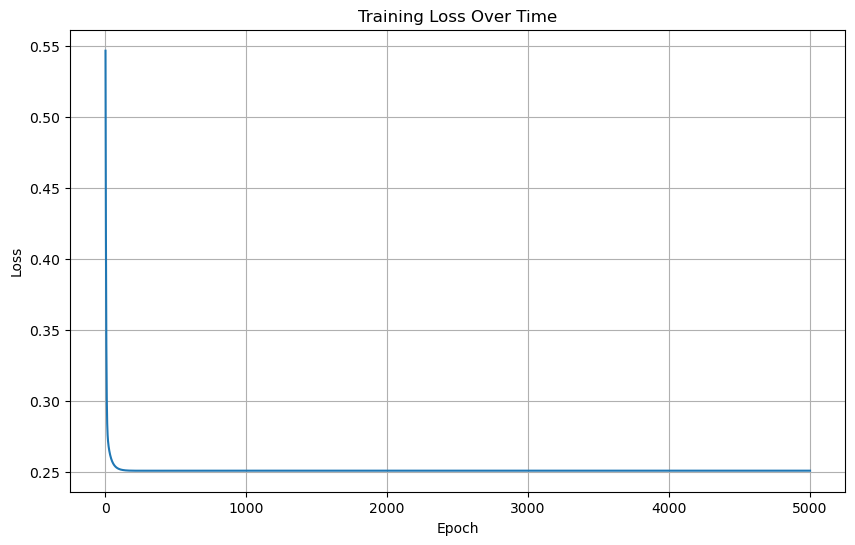

In [139]:
# Plot the training history
import matplotlib.pyplot as plt

def plot_history(history):
    """
    Plot the training loss history
    
    Args:
        history: List of tuples (epoch, loss)
    """
    epochs = [x[0] for x in history]
    losses = [x[1] for x in history]
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Plot the training history
plot_history(trainer.history)


Epoch 1/5000  Loss: 0.417551
Epoch 2/5000  Loss: 0.402489
Epoch 3/5000  Loss: 0.394670
Epoch 4/5000  Loss: 0.387813
Epoch 5/5000  Loss: 0.381687
Epoch 6/5000  Loss: 0.376236
Epoch 7/5000  Loss: 0.371401
Epoch 8/5000  Loss: 0.367108
Epoch 9/5000  Loss: 0.363281
Epoch 10/5000  Loss: 0.359844
Epoch 11/5000  Loss: 0.356728
Epoch 12/5000  Loss: 0.353872
Epoch 13/5000  Loss: 0.351224
Epoch 14/5000  Loss: 0.348743
Epoch 15/5000  Loss: 0.346394
Epoch 16/5000  Loss: 0.344152
Epoch 17/5000  Loss: 0.341996
Epoch 18/5000  Loss: 0.339912
Epoch 19/5000  Loss: 0.337887
Epoch 20/5000  Loss: 0.335915
Epoch 21/5000  Loss: 0.333988
Epoch 22/5000  Loss: 0.332104
Epoch 23/5000  Loss: 0.330258
Epoch 24/5000  Loss: 0.328450
Epoch 25/5000  Loss: 0.326677
Epoch 26/5000  Loss: 0.324939
Epoch 27/5000  Loss: 0.323235
Epoch 28/5000  Loss: 0.321565
Epoch 29/5000  Loss: 0.319928
Epoch 30/5000  Loss: 0.318324
Epoch 31/5000  Loss: 0.316752
Epoch 32/5000  Loss: 0.315212
Epoch 33/5000  Loss: 0.313705
Epoch 34/5000  Loss

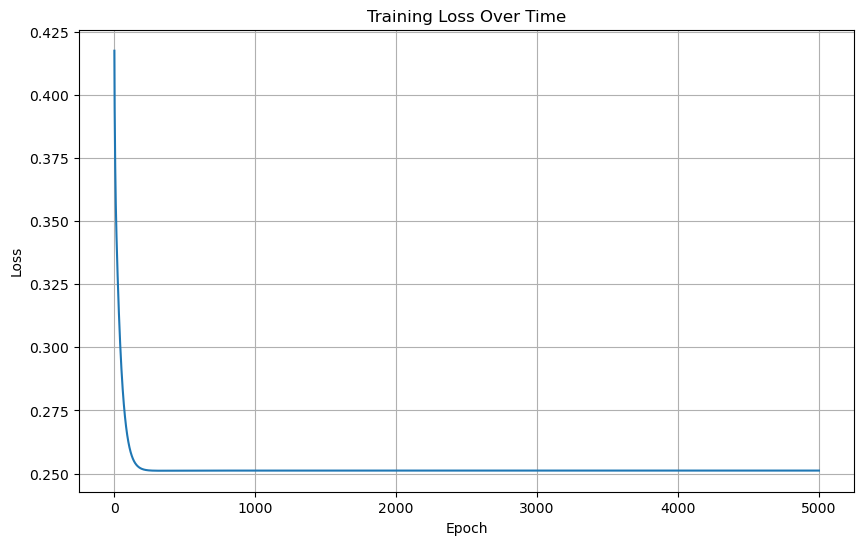

In [142]:
model = Linear(2, 1)
opt = Adam(model.parameters(), lr=0.01)


loss = Loss.mse

data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=5000)
# Plot the training history
plot_history(trainer.history)

Epoch 1/50  Loss: 1.333088
Epoch 2/50  Loss: 1.107358
Epoch 3/50  Loss: 0.932681
Epoch 4/50  Loss: 0.797357
Epoch 5/50  Loss: 0.692374
Epoch 6/50  Loss: 0.610790
Epoch 7/50  Loss: 0.547258
Epoch 8/50  Loss: 0.497658
Epoch 9/50  Loss: 0.458814
Epoch 10/50  Loss: 0.428281
Epoch 11/50  Loss: 0.404173
Epoch 12/50  Loss: 0.385039
Epoch 13/50  Loss: 0.369758
Epoch 14/50  Loss: 0.357467
Epoch 15/50  Loss: 0.347499
Epoch 16/50  Loss: 0.339341
Epoch 17/50  Loss: 0.332596
Epoch 18/50  Loss: 0.326958
Epoch 19/50  Loss: 0.322191
Epoch 20/50  Loss: 0.318111
Epoch 21/50  Loss: 0.314577
Epoch 22/50  Loss: 0.311478
Epoch 23/50  Loss: 0.308731
Epoch 24/50  Loss: 0.306268
Epoch 25/50  Loss: 0.304037
Epoch 26/50  Loss: 0.302000
Epoch 27/50  Loss: 0.300123
Epoch 28/50  Loss: 0.298383
Epoch 29/50  Loss: 0.296759
Epoch 30/50  Loss: 0.295236
Epoch 31/50  Loss: 0.293802
Epoch 32/50  Loss: 0.292445
Epoch 33/50  Loss: 0.291160
Epoch 34/50  Loss: 0.289937
Epoch 35/50  Loss: 0.288773
Epoch 36/50  Loss: 0.287663
E

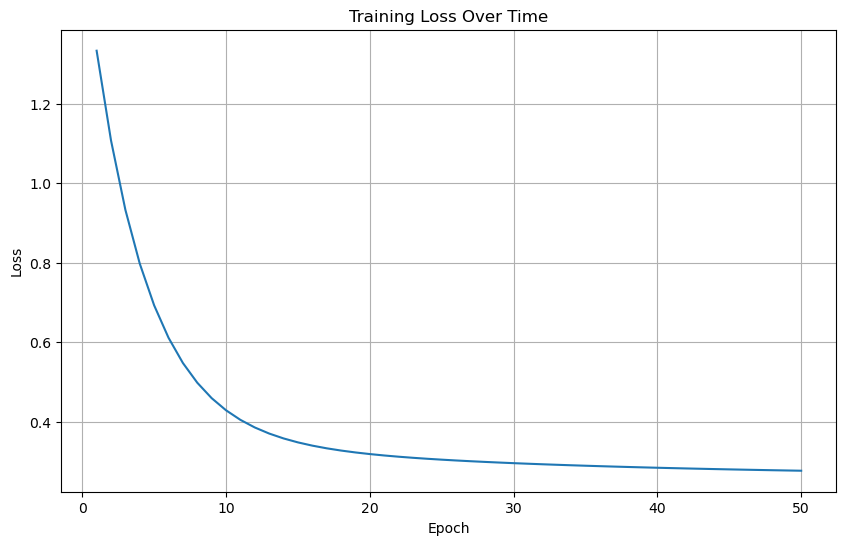

In [146]:
model = Linear(2, 1)
# opt = Adam(model.parameters(), lr=0.01)
opt = SGD(model.parameters(), lr=0.01)

loss = Loss.mse

data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=50)
# Plot the training history
plot_history(trainer.history)

Epoch 1/200  Loss: 0.247164
Epoch 2/200  Loss: 0.247084
Epoch 3/200  Loss: 0.246787
Epoch 4/200  Loss: 0.246478
Epoch 5/200  Loss: 0.246156
Epoch 6/200  Loss: 0.245822
Epoch 7/200  Loss: 0.245474
Epoch 8/200  Loss: 0.245112
Epoch 9/200  Loss: 0.244735
Epoch 10/200  Loss: 0.244344
Epoch 11/200  Loss: 0.243937
Epoch 12/200  Loss: 0.243514
Epoch 13/200  Loss: 0.243075
Epoch 14/200  Loss: 0.242619
Epoch 15/200  Loss: 0.242145
Epoch 16/200  Loss: 0.241362
Epoch 17/200  Loss: 0.241177
Epoch 18/200  Loss: 0.240652
Epoch 19/200  Loss: 0.240108
Epoch 20/200  Loss: 0.239544
Epoch 21/200  Loss: 0.238961
Epoch 22/200  Loss: 0.238358
Epoch 23/200  Loss: 0.237734
Epoch 24/200  Loss: 0.237090
Epoch 25/200  Loss: 0.236022
Epoch 26/200  Loss: 0.235804
Epoch 27/200  Loss: 0.235102
Epoch 28/200  Loss: 0.234378
Epoch 29/200  Loss: 0.233633
Epoch 30/200  Loss: 0.232867
Epoch 31/200  Loss: 0.232079
Epoch 32/200  Loss: 0.230796
Epoch 33/200  Loss: 0.230549
Epoch 34/200  Loss: 0.229706
Epoch 35/200  Loss: 0.2

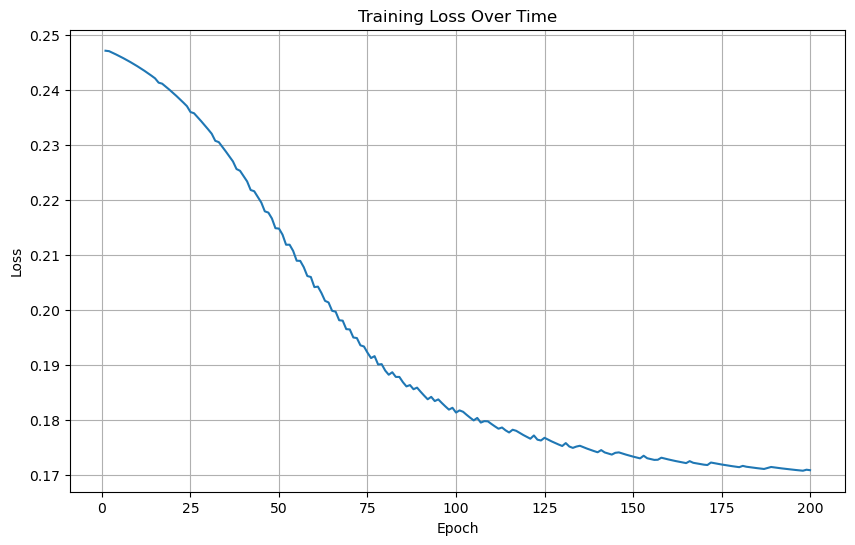

In [153]:
class MLP:
    def __init__(self):
        self.l1 = Linear(2, 2)
        self.l2 = Linear(2, 1)

    def parameters(self):
        return self.l1.parameters() + self.l2.parameters()

    def __call__(self, x):
        out = self.l1(x).relu()
        out = self.l2(out)
        return out.sigmoid()



model = MLP()
opt = SGD(model.parameters(), lr=0.1)
loss = Loss.mse



data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=200)
plot_history(trainer.history)

Epoch 1/200  Loss: 0.277035
Epoch 2/200  Loss: 0.274835
Epoch 3/200  Loss: 0.272876
Epoch 4/200  Loss: 0.271138
Epoch 5/200  Loss: 0.269601
Epoch 6/200  Loss: 0.268245
Epoch 7/200  Loss: 0.267053
Epoch 8/200  Loss: 0.266005
Epoch 9/200  Loss: 0.265087
Epoch 10/200  Loss: 0.264283
Epoch 11/200  Loss: 0.263580
Epoch 12/200  Loss: 0.262964
Epoch 13/200  Loss: 0.262426
Epoch 14/200  Loss: 0.261956
Epoch 15/200  Loss: 0.261544
Epoch 16/200  Loss: 0.261183
Epoch 17/200  Loss: 0.260867
Epoch 18/200  Loss: 0.260590
Epoch 19/200  Loss: 0.260346
Epoch 20/200  Loss: 0.260131
Epoch 21/200  Loss: 0.259941
Epoch 22/200  Loss: 0.259773
Epoch 23/200  Loss: 0.259623
Epoch 24/200  Loss: 0.259490
Epoch 25/200  Loss: 0.259372
Epoch 26/200  Loss: 0.259265
Epoch 27/200  Loss: 0.259169
Epoch 28/200  Loss: 0.259082
Epoch 29/200  Loss: 0.259003
Epoch 30/200  Loss: 0.258930
Epoch 31/200  Loss: 0.258864
Epoch 32/200  Loss: 0.258803
Epoch 33/200  Loss: 0.258746
Epoch 34/200  Loss: 0.258694
Epoch 35/200  Loss: 0.2

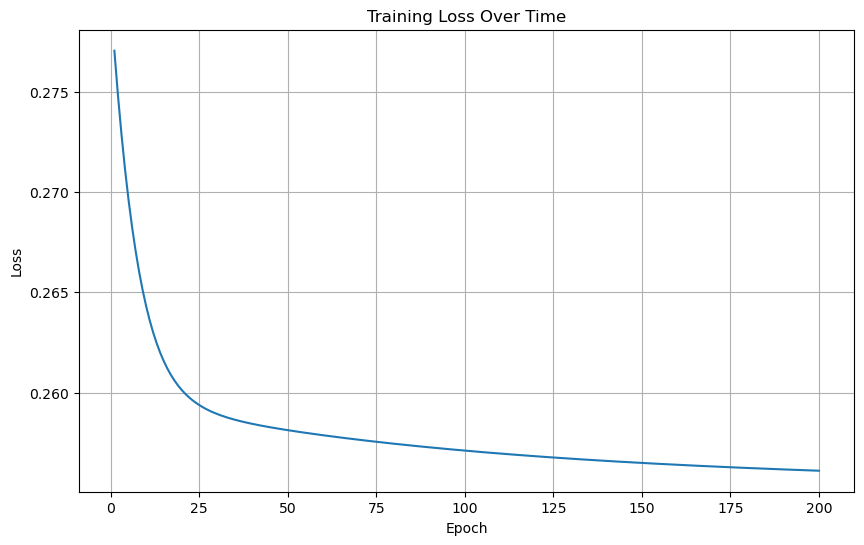

In [155]:
class MLP:
    def __init__(self):
        self.l1 = Linear(2, 2)
        self.l2 = Linear(2, 1)

    def parameters(self):
        return self.l1.parameters() + self.l2.parameters()

    def __call__(self, x):
        out = self.l1(x).sigmoid()
        out = self.l2(out)
        return out.sigmoid()



model = MLP()
opt = SGD(model.parameters(), lr=0.1)
loss = Loss.mse



data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=200)
plot_history(trainer.history)

Epoch 1/5000  Loss: 0.737073
Epoch 2/5000  Loss: 0.730345
Epoch 3/5000  Loss: 0.725264
Epoch 4/5000  Loss: 0.721428
Epoch 5/5000  Loss: 0.718531
Epoch 6/5000  Loss: 0.716340
Epoch 7/5000  Loss: 0.714681
Epoch 8/5000  Loss: 0.713423
Epoch 9/5000  Loss: 0.712465
Epoch 10/5000  Loss: 0.711734
Epoch 11/5000  Loss: 0.711174
Epoch 12/5000  Loss: 0.710742
Epoch 13/5000  Loss: 0.710406
Epoch 14/5000  Loss: 0.710144
Epoch 15/5000  Loss: 0.709936
Epoch 16/5000  Loss: 0.709770
Epoch 17/5000  Loss: 0.709634
Epoch 18/5000  Loss: 0.709522
Epoch 19/5000  Loss: 0.709428
Epoch 20/5000  Loss: 0.709347
Epoch 21/5000  Loss: 0.709276
Epoch 22/5000  Loss: 0.709212
Epoch 23/5000  Loss: 0.709154
Epoch 24/5000  Loss: 0.709100
Epoch 25/5000  Loss: 0.709049
Epoch 26/5000  Loss: 0.709001
Epoch 27/5000  Loss: 0.708953
Epoch 28/5000  Loss: 0.708907
Epoch 29/5000  Loss: 0.708862
Epoch 30/5000  Loss: 0.708818
Epoch 31/5000  Loss: 0.708773
Epoch 32/5000  Loss: 0.708729
Epoch 33/5000  Loss: 0.708685
Epoch 34/5000  Loss

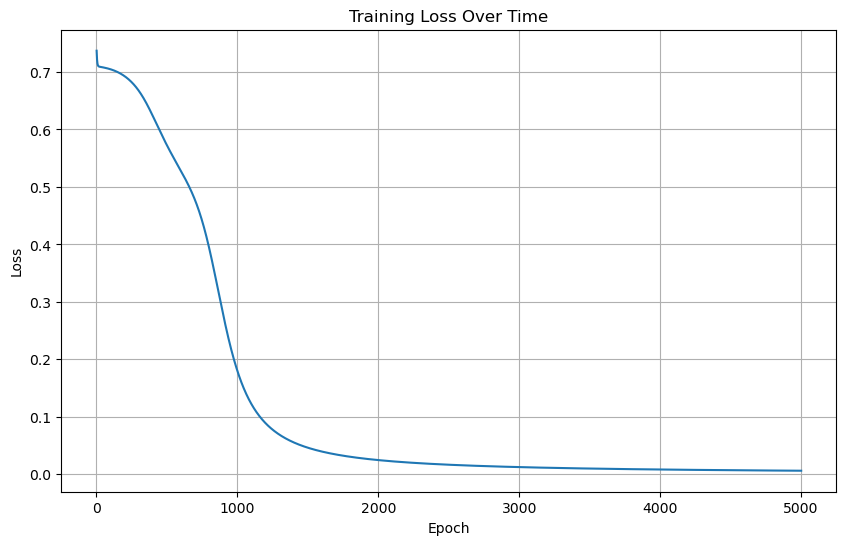

In [166]:
class MLP:
    def __init__(self):
        self.l1 = Linear(2, 2)
        self.l2 = Linear(2, 1)

    def parameters(self):
        return self.l1.parameters() + self.l2.parameters()

    def __call__(self, x):
        out = self.l1(x).sigmoid()
        out = self.l2(out)
        return out.sigmoid()



model = MLP()
opt = SGD(model.parameters(), lr=0.1)
loss = Loss.binary_cross_entropy



data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=5000)
plot_history(trainer.history)

In [164]:
a = Tensor(np.array([[1.0,2.0]]))
a.clamp(0, 1)

Tensor(data=[[ 1.000  1.000]], grad=[[ 0.000  0.000]])

When do we use CE and BCE?

| Problem Type                             | Output Layer | Activation | Target Type        | Loss |
| ---------------------------------------- | ------------ | ---------- | ------------------ | ---- |
| Binary classification                    | 1 neuron     | sigmoid    | 0 or 1             | BCE  |
| Multi-label (independent binary classes) | N neurons    | sigmoid    | N independent 0/1s | BCE  |
| Multi-class (exactly one class)          | N neurons    | softmax    | class index        | CE   |


Now instead of writing MLP we want to abstract the layers and activations into sequential 


In [167]:
class Sequential:
    def __init__(self, *layers):
        self.layers = layers

    def parameters(self):
        params = []
        for layer in self.layers:
            if hasattr(layer, "parameters"):
                params.extend(layer.parameters())
        return params

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


creating Relu callable class and adding relu to Tensor ops

In [168]:
class ReLU:
    def __call__(self, x):
        return x.relu()   # we implement Tensor.relu() next


In [169]:
class LeakyReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha

    def __call__(self, x):
        return x.leaky_relu(self.alpha)


In [170]:
class Tanh:
    def __call__(self, x):
        return x.tanh()


In [173]:
import numpy as np

class Tensor:
    def __init__(self, data, _children=(), _op='', requires_grad=True):
        self.data = np.array(data, dtype=np.float64)
        self.requires_grad = requires_grad
        self.grad = np.zeros_like(self.data) if requires_grad else None
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

    # --- Helper: Unbroadcast gradient to target shape ---
    @staticmethod
    def _unbroadcast(grad, shape):
        """
        Sum grad to match 'shape' after broadcasting.
        grad: np.ndarray (upstream gradient)
        shape: tuple (target shape)
        """
        if grad is None:
            return None
        g = grad
        # sum extra leading dims
        while g.ndim > len(shape):
            g = g.sum(axis=0)
        # sum over dims that were broadcast (shape dim ==1)
        for i, dim in enumerate(shape):
            if dim == 1:
                g = g.sum(axis=i, keepdims=True)
        return g

    # ---- Core ops ----
    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data + other.data, (self, other), '+')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = Tensor._unbroadcast(out.grad, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = Tensor._unbroadcast(out.grad, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        return self + (-other)

    def __rsub__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        return other + (-self)

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data * other.data, (self, other), '*')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = out.grad * other.data
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = out.grad * self.data
                grad_other = Tensor._unbroadcast(grad_other, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data / other.data, (self, other), '/')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = out.grad / other.data
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = -out.grad * self.data / (other.data ** 2)
                grad_other = Tensor._unbroadcast(grad_other, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    def __pow__(self, power):
        assert isinstance(power, (int, float))
        out = Tensor(self.data ** power, (self,), f'**{power}')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad_self = (power * (self.data ** (power - 1))) * out.grad
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self

        out._backward = _backward
        return out

    def __matmul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other, requires_grad=False)
        out = Tensor(self.data @ other.data, (self, other), '@')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                # out.grad shape is (m,p), other.data.T shape (p,n) => (m,n)
                grad_self = out.grad @ other.data.T
                # should already match self.data.shape
                grad_self = Tensor._unbroadcast(grad_self, self.data.shape)
                self.grad += grad_self
            if other.requires_grad:
                grad_other = self.data.T @ out.grad
                grad_other = Tensor._unbroadcast(grad_other, other.data.shape)
                other.grad += grad_other

        out._backward = _backward
        return out

    # ---- Unary ops ----
    def tanh(self):
        out_data = np.tanh(self.data)
        out = Tensor(out_data, (self,), 'tanh')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += (1 - out_data ** 2) * out.grad

        out._backward = _backward
        return out

    def relu(self):
        out_data = np.maximum(0, self.data)
        out = Tensor(out_data, (self,), 'relu')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += (self.data > 0) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        out_data = np.exp(self.data)
        out = Tensor(out_data, (self,), 'exp')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += out_data * out.grad

        out._backward = _backward
        return out

    def log(self):
        out_data = np.log(self.data)
        out = Tensor(out_data, (self,), 'log')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += (1.0 / self.data) * out.grad

        out._backward = _backward
        return out

    def sigmoid(self):
        s = 1 / (1 + np.exp(-self.data))
        out = Tensor(s, (self,), 'sigmoid')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                self.grad += s * (1 - s) * out.grad

        out._backward = _backward
        return out

    # ---- Reductions ----
    def sum(self, axis=None, keepdims=False):
        out_data = self.data.sum(axis=axis, keepdims=keepdims)
        out = Tensor(out_data, (self,), 'sum')

        def _backward():
            if out.grad is None:
                return
            if self.requires_grad:
                grad = out.grad
                if axis is not None and not keepdims:
                    grad = np.expand_dims(grad, axis)
                self.grad += np.ones_like(self.data) * grad

        out._backward = _backward
        return out

    def mean(self, axis=None, keepdims=False):
        out_data = self.data.mean(axis=axis, keepdims=keepdims)

        # ensure array shape even if scalar
        out_data = np.array(out_data, dtype=np.float32)

        # divisor depends on axis
        if axis is None:
            divisor = self.data.size
        else:
            divisor = self.data.shape[axis]

        out = Tensor(out_data, (self,), 'mean')

        def _backward():
            if self.requires_grad:
                grad = out.grad / divisor

                # match reduced dimensions
                if axis is not None and not keepdims:
                    grad = np.expand_dims(grad, axis)

                # expand grad over original shape
                self.grad += np.ones_like(self.data) * grad

        out._backward = _backward
        return out

    
    def clamp(self, min_val, max_val):
        clamped = np.clip(self.data, min_val, max_val)
        out = Tensor(clamped, (self,), 'clamp')

        def _backward():
            if self.requires_grad:
                mask = (self.data >= min_val) & (self.data <= max_val)
                self.grad += out.grad * mask

        out._backward = _backward
        return out

    def relu(self):
        out_data = np.maximum(0, self.data)
        out = Tensor(out_data, (self,), 'relu')

        def _backward():
            if self.requires_grad:
                self.grad += (self.data > 0) * out.grad

        out._backward = _backward
        return out

    def leaky_relu(self, alpha=0.01):
        out_data = np.where(self.data > 0, self.data, alpha * self.data)
        out = Tensor(out_data, (self,), 'leaky_relu')

        def _backward():
            if self.requires_grad:
                grad = np.where(self.data > 0, 1, alpha)
                self.grad += out.grad * grad

        out._backward = _backward
        return out


    def softmax(self):
        exps = (self.data - self.data.max(axis=1, keepdims=True))
        exps = np.exp(exps)
        out_data = exps / exps.sum(axis=1, keepdims=True)
        out = Tensor(out_data, (self,), 'softmax')

        def _backward():
            # optional: implement full softmax backward
            # but real frameworks use log_softmax + nll only
            pass

        out._backward = _backward
        return out

    def log_softmax(self, axis=-1):
        # numerically stable log-softmax
        shifted = self.data - np.max(self.data, axis=axis, keepdims=True)
        exps = np.exp(shifted)
        sum_exps = np.sum(exps, axis=axis, keepdims=True)

        out_data = shifted - np.log(sum_exps)  # log_softmax outputs

        out = Tensor(out_data, (self,), 'log_softmax')

        def _backward():
            if not self.requires_grad:
                return

            # softmax = exp(log_softmax)
            softmax_output = np.exp(out_data)
            grad_out = out.grad

            # vectorized Jacobian for log_softmax:
            # dL/dx = grad_out - softmax * sum(grad_out)
            sum_grad = np.sum(grad_out, axis=axis, keepdims=True)
            grad_self = grad_out - softmax_output * sum_grad

            self.grad += grad_self

        out._backward = _backward
        return out


    # ---- Backprop ----
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        # seed gradient for root (dL/dL = 1)
        if self.grad is None:
            self.grad = np.ones_like(self.data)
        else:
            self.grad = np.ones_like(self.data)

        for v in reversed(topo):
            v._backward()


In [174]:
model = Sequential(
    Linear(2, 4),
    ReLU(),
    Linear(4, 4),
    ReLU(),
    Linear(4, 1),
    Sigmoid()  # or leave last as linear + BCE
)



Epoch 1/5000  Loss: 0.707915
Epoch 2/5000  Loss: 0.708095
Epoch 3/5000  Loss: 0.707950
Epoch 4/5000  Loss: 0.707822
Epoch 5/5000  Loss: 0.707708
Epoch 6/5000  Loss: 0.707605
Epoch 7/5000  Loss: 0.707513
Epoch 8/5000  Loss: 0.707428
Epoch 9/5000  Loss: 0.707350
Epoch 10/5000  Loss: 0.707278
Epoch 11/5000  Loss: 0.707211
Epoch 12/5000  Loss: 0.707112
Epoch 13/5000  Loss: 0.707104
Epoch 14/5000  Loss: 0.707047
Epoch 15/5000  Loss: 0.706994
Epoch 16/5000  Loss: 0.706944
Epoch 17/5000  Loss: 0.706896
Epoch 18/5000  Loss: 0.706705
Epoch 19/5000  Loss: 0.706852
Epoch 20/5000  Loss: 0.706808
Epoch 21/5000  Loss: 0.706767
Epoch 22/5000  Loss: 0.706727
Epoch 23/5000  Loss: 0.706689
Epoch 24/5000  Loss: 0.706652
Epoch 25/5000  Loss: 0.706617
Epoch 26/5000  Loss: 0.706583
Epoch 27/5000  Loss: 0.706550
Epoch 28/5000  Loss: 0.706518
Epoch 29/5000  Loss: 0.706487
Epoch 30/5000  Loss: 0.706457
Epoch 31/5000  Loss: 0.706428
Epoch 32/5000  Loss: 0.706400
Epoch 33/5000  Loss: 0.706373
Epoch 34/5000  Loss

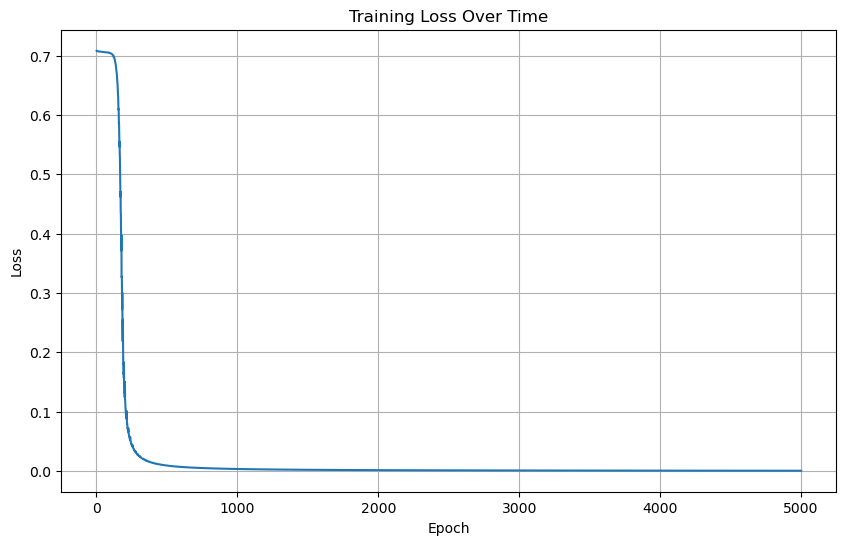

In [175]:
opt = SGD(model.parameters(), lr=0.1)
loss = Loss.binary_cross_entropy



data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=5000)
plot_history(trainer.history)

Epoch 1/5000  Loss: 0.816575
Epoch 2/5000  Loss: 0.783748
Epoch 3/5000  Loss: 0.761672
Epoch 4/5000  Loss: 0.746940
Epoch 5/5000  Loss: 0.737151
Epoch 6/5000  Loss: 0.730655
Epoch 7/5000  Loss: 0.726344
Epoch 8/5000  Loss: 0.723480
Epoch 9/5000  Loss: 0.721572
Epoch 10/5000  Loss: 0.720298
Epoch 11/5000  Loss: 0.719443
Epoch 12/5000  Loss: 0.718866
Epoch 13/5000  Loss: 0.718475
Epoch 14/5000  Loss: 0.718206
Epoch 15/5000  Loss: 0.718020
Epoch 16/5000  Loss: 0.717888
Epoch 17/5000  Loss: 0.717793
Epoch 18/5000  Loss: 0.717722
Epoch 19/5000  Loss: 0.717668
Epoch 20/5000  Loss: 0.717625
Epoch 21/5000  Loss: 0.717589
Epoch 22/5000  Loss: 0.717559
Epoch 23/5000  Loss: 0.717532
Epoch 24/5000  Loss: 0.717507
Epoch 25/5000  Loss: 0.717484
Epoch 26/5000  Loss: 0.717463
Epoch 27/5000  Loss: 0.717442
Epoch 28/5000  Loss: 0.717421
Epoch 29/5000  Loss: 0.717401
Epoch 30/5000  Loss: 0.717382
Epoch 31/5000  Loss: 0.717362
Epoch 32/5000  Loss: 0.717343
Epoch 33/5000  Loss: 0.717324
Epoch 34/5000  Loss

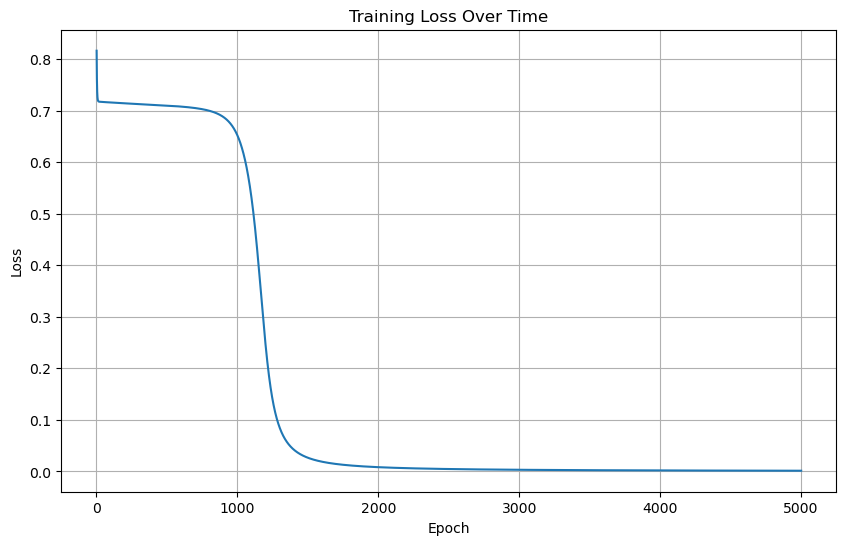

In [176]:

model = Sequential(
    Linear(2, 4),
    Sigmoid(),
    Linear(4, 3),
    Sigmoid(),
    Linear(3, 1),
    Sigmoid()
)

opt = SGD(model.parameters(), lr=0.1)
loss = Loss.binary_cross_entropy



data = [
    (np.array([[0.,0.]]), np.array([[0.]])),
    (np.array([[0.,1.]]), np.array([[1.]])),
    (np.array([[1.,0.]]), np.array([[1.]])),
    (np.array([[1.,1.]]), np.array([[0.]])),
]

trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=5000)
plot_history(trainer.history)

Code migrations from this notebook to actual python file as a library

In [183]:
import os

print(os.listdir('scratch'))
print(os.listdir('scratch/nn'))

['utils.py', 'nn', 'trainer.py', 'tensor.py']
['optim.py', 'activations.py', 'linear.py', 'loss.py']


lets try this lib in new notebook

note **

if i see my self in 2 roles right now that is scratch user and scratch developer. the user the usage is amost same for scrach and pytorch but in scratch graph is static and in python using np where as in case of pytorch it using c++/cuda 

🎭 1. As a Scratch User

Your experience is very similar to PyTorch:

✔ You write:
y_pred = model(x)
loss = Loss.mse(y_pred, y)
loss.backward()
opt.step()

✔ You define models using:
model = Sequential(
    Linear(2, 4),
    ReLU(),
    Linear(4, 1)
)

✔ You don’t think about:

Graph nodes

Backprop rules

How gradients flow

So as a user, your scratch framework behaves like a small PyTorch clone.

🎭 2. As a Scratch Developer

Here you see the real differences.

Let’s compare them clearly:

⭐ Difference #1 — Graph Construction
Scratch → Manual Dynamic Graph

You write in every operation:

out = Tensor(data, (self, other), op_name)
out._backward = backward_function


You manually build the computation graph node-by-node.

PyTorch → Autograd Dynamic Graph

PyTorch intercepts every operation in C++:

Creates a Node

Stores parents

Stores backward function

Registers it in autograd engine

The user never writes backward code.

⭐ Difference #2 — Backend (Compute Engine)
Scratch

Uses NumPy (CPU only)

No GPU support

No C++ speedups

Python loops → slower

PyTorch

Backend is written in C++ + CUDA

Uses cuBLAS, cuDNN, optimized kernels

GPU acceleration

JIT accelerators

Faster by 1000x+

⭐ Difference #3 — Graph Type
✔ Both Scratch and PyTorch = Dynamic Graphs

NOT static like TensorFlow 1.x.

Meaning:

if random.random() > 0.5:
    y = x * 3
else:
    y = x + 5


The graph is created differently each forward pass.

⭐ Difference #4 — Backward Logic
Scratch

You implement backward manually:

def _backward():
    dx = out.grad * something
    self.grad += dx

PyTorch

Backward logic is:

Predefined in C++

Highly optimized

Includes edge cases

Supports broadcasting, strides, views, contiguous tensors

Does gradient accumulation, hooks, autograd engine scheduling

⭐ Difference #5 — Memory & Optimizations
Scratch

No:

Gradient checkpointing

Graph pruning

Zero-copy views

Stride-based tensors

In-place op detection

GPU memory pooling

PyTorch

Has all of the above, making it efficient for huge deep learning models.

🔥 Best Summary
Role	Scratch	PyTorch
As a User	API feels like PyTorch	API feels like PyTorch
As a Developer	You build nodes & gradients manually	Autograd builds nodes & gradients automatically
Backend	NumPy + Python	C++ + CUDA
Performance	slow	super fast
Graph	dynamic	dynamic
Ops	you implement each op	hundreds built-in
Backward	you write backward	autograd handles everything
🎯 What you should feel proud of

As a developer, you built:

A functioning autograd engine

A dynamic compute graph

A tensor class

A minimal nn.Module & layers

An optimizer engine

A trainer

A sequential model system

Binary/XOR training success

This is exactly how PyTorch was originally created, just smaller.